# Text preprocessing and basic text mining

During text preprocessing, a corpus of documents is tokenized (i.e. the document strings are split into individual words, punctuation, numbers, etc.) and then these tokens can be transformed, filtered or annotated. The goal is to prepare the raw document texts in a way that makes it easier to perform eventual text mining and analysis methods in a later stage, e.g. by reducing noise in the dataset. The package tmtoolkit provides a rich set of tools for this purpose implemented as *corpus functions* in the [tmtoolkit.corpus](api.rst#tmtoolkit-corpus) module.

<div class="alert alert-info">

**Reminder: Corpus functions**

All *corpus functions* accept a [Corpus](api.rst#tmtoolkit.corpus.Corpus) object as first argument and operate on it. A corpus function may retrieve information from a corpus and/or modify the corpus object.

</div>


## Optional: enabling logging output

By default, tmtoolkit does not expose any internal logging messages. Sometimes, for example for diagnostic output during debugging or in order to see progress for long running operations, it's helpful to enable logging output display. For that, you can use the [enable_logging](api.rst#tmtoolkit.utils.enable_logging) function. By default, it enables logging to console for the `INFO` level.

In [1]:
from tmtoolkit.utils import enable_logging

enable_logging()

## Loading example data

Let's load a sample of ten documents from the built-in *NewsArticles* dataset. We'll use only a small number of documents here to have a better overview at the beginning. We can later use a larger sample. To apply sampling right at the beginning when loading the data, we pass the `sample=100` parameter to the [from_builtin_corpus](api.rst#tmtoolkit.corpus.Corpus.from_builtin_corpus) class method. We also use [print_summary](api.rst#tmtoolkit.corpus.print_summary) like shown in the previous chapter.

In [2]:
import random
random.seed(20220119)   # to make the sampling reproducible

from tmtoolkit.corpus import Corpus, print_summary

corpus_small = Corpus.from_builtin_corpus('en-NewsArticles', sample=100)
print_summary(corpus_small)

2023-04-05 17:36:41,293:INFO:tmtoolkit:creating Corpus instance with no documents
2023-04-05 17:36:41,294:INFO:tmtoolkit:using serial processing
2023-04-05 17:36:41,504:INFO:tmtoolkit:sampling 100 documents(s) out of 3824
2023-04-05 17:36:41,506:INFO:tmtoolkit:adding text from 100 documents(s)
2023-04-05 17:36:41,507:INFO:tmtoolkit:running NLP pipeline on 100 documents
2023-04-05 17:36:44,333:INFO:tmtoolkit:generating document texts


Corpus with 100 documents in English
> NewsArticles-1185 (1271 tokens): For more than a week,-France - has been rocked by ...
> NewsArticles-1353 (30 tokens): Islamic State battle : Fierce gunfight outside Mos...
> NewsArticles-1377 (774 tokens): Turkey - backed rebels in ' near full control ' of...
> NewsArticles-1100 (224 tokens): President Trump says he has asked the Justice Depa...
> NewsArticles-1407 (202 tokens): Minister reiterates Govt support for Finucane inqu...
> NewsArticles-1263 (410 tokens): Russian doctors use mobile field hospital to provi...
> NewsArticles-1472 (298 tokens): Royal Bank of Scotland sees losses widening    Bai...
> NewsArticles-1119 (975 tokens): An amazing moment in history : Donald Trump 's pre...
> NewsArticles-1515 (426 tokens): Trump suggests Obama was ' behind ' town hall prot...
> NewsArticles-1387 (513 tokens): Protests after Anaheim policeman drags teen , fire...
(and 90 more documents)
total number of tokens: 59598 / vocabulary size: 9223


The logging information was printed on red, the information below on white came from `print_summary`. We will disable logging again using [disable_logging](api.rst#tmtoolkit.utils.disable_logging):

In [3]:
from tmtoolkit.utils import disable_logging

disable_logging()

These are the first 10 names of the documents that were loaded:

In [4]:
from tmtoolkit.corpus import doc_labels

doc_labels(corpus_small)[:10]

['NewsArticles-1100',
 'NewsArticles-1119',
 'NewsArticles-1185',
 'NewsArticles-1263',
 'NewsArticles-1353',
 'NewsArticles-1377',
 'NewsArticles-1387',
 'NewsArticles-1407',
 'NewsArticles-1472',
 'NewsArticles-1515']

## Accessing tokens and token attributes

We start with accessing the documents' tokens and their *token attributes* using [doc_tokens](api.rst#tmtoolkit.corpus.doc_tokens) and [tokens_table](api.rst#tmtoolkit.corpus.tokens_table). Token attributes are meta information attached to each token. These can be linguistic features, such as the Part of Speech (POS) tag, indicators for stopwords or punctuation, etc. The default attributes are a subset of [SpaCy's token attributes](https://spacy.io/api/token#attributes). You can configure which of these attributes are stored using the `spacy_token_attrs` parameter of the `Corpus` constructor. You can also add your own token attributes. This will be shown later on.

At first we load the tokens along with their attributes via `doc_tokens`, which gives us a dictionary mapping document labels to document data. Each document data is another dictionary that contains the tokens and their attributes. We start by checking which token attributes are loaded by default in any document (here, we use "NewsArticles-2433"):

In [5]:
from tmtoolkit.corpus import doc_tokens, tokens_table

# with_attr=True adds default set of token attributes
tok = doc_tokens(corpus_small, with_attr=True)
tok['NewsArticles-2433'].keys()

dict_keys(['token', 'is_punct', 'is_stop', 'like_num', 'tag', 'pos', 'lemma'])

So each document's data can be accessed like in the example above and it will contain the seven data entries listed above. The `'token'` entry gives the actual tokens of the document. Let's show the first five tokens for a document:

In [6]:
tok['NewsArticles-2433']['token'][:5]

['DOJ', ':', '2', 'Russian', 'spies']

The other entries are the attributes corresponding to each token. Here, we display the first five lemmata for the same document and the first five punctuation indicator values. The colon is correctly identified as punctuation character.

In [7]:
tok['NewsArticles-2433']['lemma'][:5]

['doj', ':', '2', 'russian', 'spy']

In [8]:
tok['NewsArticles-2433']['is_punct'][:5]

[False, True, False, False, False]

If your NLP pipeline performs sentence recognition, you can pass the parameter `sentences=True` which will add another level to the output representing sentences. This means that for each item like `'token'`, `'lemma'`, etc. we will get a list of sentences. For example, the following will print the tokens of the 8th sentence (index 7):

In [9]:
tok_sents = doc_tokens(corpus_small, sentences=True, with_attr=True)
tok_sents['NewsArticles-2433']['token'][7]   # index 7 means 8th sentence

['A',
 'Justice',
 'Department',
 'official',
 'said',
 'the',
 'agency',
 'has',
 'not',
 'confirmed',
 'it',
 'is',
 'the',
 'same',
 'person',
 'and',
 'declined',
 'further',
 'comment',
 'to',
 'CNN',
 '.']

For a more compact overview, it's better to use the [tokens_table](api.rst#tmtoolkit.corpus.tokens_table) function. This will generate a [pandas DataFrame](https://pandas.pydata.org/) from the documents in the corpus and it will by default include all token attributes, along with a column for the document label (`doc`) and the token position inside the document (`position`).

In [10]:
tbl = tokens_table(corpus_small)
tbl

,doc,position,token,is_punct,is_stop,lemma,like_num,pos,tag
0,NewsArticles-1100,0,President,False,False,President,False,PROPN,NNP
1,NewsArticles-1100,1,Trump,False,False,Trump,False,PROPN,NNP
2,NewsArticles-1100,2,says,False,False,say,False,VERB,VBZ
3,NewsArticles-1100,3,he,False,True,he,False,PRON,PRP
4,NewsArticles-1100,4,has,False,True,have,False,AUX,VBZ
...,...,...,...,...,...,...,...,...,...
59593,NewsArticles-960,282,priorities,False,False,priority,False,NOUN,NNS
59594,NewsArticles-960,283,for,False,True,for,False,ADP,IN
59595,NewsArticles-960,284,the,False,True,the,False,DET,DT
59596,NewsArticles-960,285,nation,False,False,nation,False,NOUN,NN


You can use all sorts of filtering operations on this dataframe. See the [pandas documentation](https://pandas.pydata.org/docs/user_guide/indexing.html) for details. Here, we select all tokens that were identified as "number-like":

In [11]:
tbl[tbl.like_num]

,doc,position,token,is_punct,is_stop,lemma,like_num,pos,tag
288,NewsArticles-1119,64,fifteen,False,True,fifteen,True,NUM,CD
320,NewsArticles-1119,96,one,False,True,one,True,NUM,CD
328,NewsArticles-1119,104,four,False,True,four,True,NUM,CD
759,NewsArticles-1119,535,100,False,False,100,True,NUM,CD
787,NewsArticles-1119,563,four,False,True,four,True,NUM,CD
...,...,...,...,...,...,...,...,...,...
59253,NewsArticles-901,856,85,False,False,85,True,NUM,CD
59256,NewsArticles-901,859,9,False,False,9,True,NUM,CD
59374,NewsArticles-960,63,2021,False,False,2021,True,NUM,CD
59400,NewsArticles-960,89,2010,False,False,2010,True,NUM,CD


This however only filters the table *output*. We will later see how to filter corpus documents and tokens.

If you want to generate the table only for a subset of documents, you can use the `select` parameter and provide one or more document labels. Similar to that, you can use the `with_attr` parameter to list only a subset of the token attributes.

In [12]:
# select a single document and only show the "pos" attribute (coarse POS tag)
tokens_table(corpus_small, select='NewsArticles-2433', sentences=True, with_attr='pos')

,doc,sent,position,token,pos
0,NewsArticles-2433,0,0,DOJ,NOUN
1,NewsArticles-2433,0,1,:,PUNCT
2,NewsArticles-2433,0,2,2,NUM
3,NewsArticles-2433,0,3,Russian,ADJ
4,NewsArticles-2433,0,4,spies,NOUN
...,...,...,...,...,...
837,NewsArticles-2433,27,837,to,PART
838,NewsArticles-2433,27,838,reflect,VERB
839,NewsArticles-2433,27,839,new,ADJ
840,NewsArticles-2433,27,840,developments,NOUN


In [13]:
# select two documents and only show the "pos" and "tag" attributes
# (coarse and detailed POS tags)
tokens_table(corpus_small, select=['NewsArticles-2433', 'NewsArticles-49'],
             with_attr=['pos', 'tag'])

,doc,position,token,pos,tag
0,NewsArticles-2433,0,DOJ,NOUN,NN
1,NewsArticles-2433,1,:,PUNCT,:
2,NewsArticles-2433,2,2,NUM,CD
3,NewsArticles-2433,3,Russian,ADJ,JJ
4,NewsArticles-2433,4,spies,NOUN,NNS
...,...,...,...,...,...
1949,NewsArticles-49,1107,fight,VERB,VB
1950,NewsArticles-49,1108,to,PART,TO
1951,NewsArticles-49,1109,defend,VERB,VB
1952,NewsArticles-49,1110,it,PRON,PRP


<div class="alert alert-info">

**Side note: Common corpus function parameters**
    
Many corpus functions share the same parameter names and when they do, they implicate the same behavior. As already explained, all corpus functions accept a `Corpus` object as first parameter. But next to that, many corpus functions also accept a `select` parameter, which can always be used to specify a subset of the documents to which the respective function is applied. We also already got to know the `sentences` parameter that some corpus functions accept in order to also represent the sentence structure of a document in their output.
    
To know which functions accept which parameter, check their documentation.

</div>

## Corpus vocabulary

The corpus *vocabulary* is the set of unique tokens (usually refered to as *token types*) in a corpus. We can get that set via [vocabulary](api.rst#tmtoolkit.corpus.vocabulary). By default, the set is converted to a sorted list:

In [14]:
from tmtoolkit.corpus import vocabulary

vocabulary(corpus_small)

['\n\n',
 '\n\n ',
 ' ',
 '  ',
 '   ',
 '    ',
 '!',
 '"',
 '"-',
 '"?"But',
 '"?"I',
 '"?"hiba',
 '"?"the',
 '"?Although',
 '"?And',
 '"?Depending',
 '"?During',
 '"?For',
 '"?House',
 '"?Indo',
 '"?Responding',
 '"?Schabaz',
 '"?Stay',
 '"?The',
 '"?There',
 '"?This',
 '"?Though',
 '"?Through',
 '"?We',
 '"?Wright',
 '"?Yet',
 '"He',
 '"Motor',
 '"One',
 '"he',
 '#',
 '$',
 '%',
 '&',
 "'",
 "'-",
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '--',
 '--is',
 '-A',
 '-an',
 '-have',
 '-the',
 '.',
 '...',
 '.@KellyannePolls',
 '/',
 '/Syria/',
 '/TASS/.',
 '0.1',
 '0.2',
 '0.4',
 '0.6',
 '0.75',
 '01/06/2017',
 '01/13/2017',
 '01/20/2017',
 '01/27/2017',
 '02.03.2017',
 '0400',
 '08:30',
 '09.03.2017',
 '1',
 '1,000',
 '1,000th',
 '1,550',
 '1,900',
 '1.00',
 '1.08',
 '1.2',
 '1.5',
 '1.6',
 '1.7',
 '10',
 '10,000',
 '100',
 '100,000.-',
 '104,000',
 '11',
 '11,000',
 '116',
 '118',
 '11:00',
 '12',
 '12,000',
 '12.5',
 '12.6',
 '12/16/2016',
 '12

The parameter setting `sort=False` results in emitting a Python set:

In [15]:
vocabulary(corpus_small, sort=False)

{'lifetime',
 'pointless',
 'Rumble',
 'cover',
 'Robbie',
 'murdered',
 'Worried',
 'supervision',
 'advocacy',
 'Fitchburg',
 'victory',
 'takeaway',
 'talent',
 'jail',
 'style',
 'Whoever',
 'assassinate',
 'territory',
 'Somalia',
 'QQ',
 'quick',
 'lawns',
 'Streamlining',
 'reliable',
 'row',
 'symptoms',
 'review',
 'Bridge',
 'starred',
 'eligible',
 'compliance',
 'expressionism',
 'unfathomable',
 'triggered',
 'squeeze',
 'Venus',
 'ministry',
 'flagging',
 'published',
 '1961',
 'Neath',
 'gender',
 'splash',
 'Bureau',
 'bone',
 'Self',
 'independence',
 'realism',
 'roles',
 'taquerias',
 'sponsors',
 'Policy',
 'minister',
 'yelling',
 'excess',
 'citizenship',
 'struggles',
 'winning',
 'deteriorating',
 'Mandela',
 'threw',
 'Reelin',
 'explicitly',
 'revolutionary',
 'smiles',
 'Baron',
 'Airport',
 'resonant',
 'Syria',
 'thanks',
 'hospitals',
 'week',
 'Breitbart',
 'Let',
 'sources',
 'cu--',
 'Obamacare',
 'questioning',
 'sentimental',
 'stores',
 '2024',
 'dep

This corpus function also accepts a `select` parameter. To get the sorted vocabulary for document "NewsArticles-2433", we can write:

In [16]:
vocabulary(corpus_small, select='NewsArticles-2433')

['\n\n',
 '"',
 "'s",
 '(',
 ')',
 ',',
 '-',
 '--',
 '.',
 '2',
 '2014',
 '22',
 '29',
 '33',
 '43',
 '500',
 ':',
 'A',
 'Akehmet',
 'Aleksandrovich',
 'Alexsey',
 'Alexseyevich',
 'American',
 'Anatolyevich',
 'Ancaster',
 'Assistant',
 'Attorney',
 'Baratov',
 'Beijing',
 'Belan',
 'But',
 'CEO',
 'CNN',
 'CNN)The',
 'Canada',
 'China',
 'Chinese',
 'Clinton',
 'Committee',
 'DOJ',
 'December',
 'Democratic',
 'Department',
 'Dmitry',
 'Dokuchaev',
 'Donald',
 'FBI',
 'FSB',
 'Federal',
 'Francisco',
 'General',
 'Google',
 'Hackers',
 'Hillary',
 'Igor',
 'January',
 'John',
 'Justice',
 'KGB',
 'Karim',
 'Kay',
 'Magg',
 'Marissa',
 'Mark',
 'Mary',
 'Mayer',
 'McCord',
 'Moscow',
 'National',
 'Ontario',
 'Podesta',
 'President',
 'Previous',
 'Pugash',
 'Russia',
 'Russian',
 'San',
 'Security',
 'September',
 'Service',
 'Some',
 'Soviet',
 'Strained',
 'Sushchin',
 'Taloverov',
 'That',
 'The',
 'This',
 'Tokbergenov',
 'Toronto',
 'Trump',
 'Tuesday',
 'US',
 'Union',
 'Wash

To get the number of unique tokens in the corpus, i.e. the vocabulary size, we can use [vocabulary_size](api.rst#tmtoolkit.corpus.vocabulary_size), which is basically a shortcut for `len(vocabulary(<Corpus object>))`:

In [17]:
from tmtoolkit.corpus import vocabulary_size

vocabulary_size(corpus_small)

9223

The corpus function [vocabulary_counts](api.rst#tmtoolkit.corpus.vocabulary_size) is useful to find out how often each token in the vocabulary occurs in the corpus:

In [18]:
from tmtoolkit.corpus import vocabulary_counts

vocabulary_counts(corpus_small)

{'ID': 1,
 'agent': 6,
 'cop': 1,
 'mark': 1,
 'number': 18,
 'passion': 1,
 'unable': 1,
 'Where': 2,
 'types.-': 1,
 'Closer': 1,
 'Reflection': 1,
 'approach': 8,
 'users': 10,
 'average': 11,
 'designed': 2,
 'geared': 1,
 'stream': 3,
 'sites': 2,
 'deportation': 4,
 'discourse': 1,
 'cell': 4,
 'conduct': 3,
 'angry': 3,
 'reverse': 1,
 'Individual': 1,
 'alone': 5,
 'contradictions': 2,
 'Yoda': 1,
 'estranged': 3,
 'veterans': 2,
 'execution': 1,
 'tell': 1,
 'Bill': 6,
 'cyberexperts': 1,
 'surge': 4,
 'Hadid': 1,
 'addressing': 2,
 'AIDS': 1,
 '20,000': 1,
 'loss': 3,
 'lead': 8,
 'countering': 1,
 'basically': 4,
 'coincidence': 2,
 'cleared': 4,
 'Armenia': 1,
 'candidates': 4,
 'Health': 5,
 'nominees': 2,
 'Weird': 3,
 'I-75': 4,
 'tells': 2,
 'repainting': 1,
 'recipients': 1,
 'adventure': 1,
 'SNP': 2,
 'Taoiseach': 8,
 'annual': 2,
 'please': 1,
 'Tomas': 1,
 'payment': 1,
 'German': 8,
 'Plug': 1,
 'boils': 1,
 'academic': 1,
 'misused': 1,
 'nasty': 1,
 'Combo': 1,


If you don't want to obtain absolute counts, you can use the `proportions` parameter. Setting it to `1` gives you ordinary proportions (i.e. $\frac{x_i}{\sum_j x_j}$) and `2` gives you these proportions on a log10 scale.

In [19]:
vocab_proportions = vocabulary_counts(corpus_small, proportions=1)
vocab_proportions   # will reuse that later

{'ID': 1.6779086546528407e-05,
 'agent': 0.00010067451927917044,
 'cop': 1.6779086546528407e-05,
 'mark': 1.6779086546528407e-05,
 'number': 0.0003020235578375113,
 'passion': 1.6779086546528407e-05,
 'unable': 1.6779086546528407e-05,
 'Where': 3.3558173093056814e-05,
 'types.-': 1.6779086546528407e-05,
 'Closer': 1.6779086546528407e-05,
 'Reflection': 1.6779086546528407e-05,
 'approach': 0.00013423269237222726,
 'users': 0.00016779086546528407,
 'average': 0.00018456995201181247,
 'designed': 3.3558173093056814e-05,
 'geared': 1.6779086546528407e-05,
 'stream': 5.033725963958522e-05,
 'sites': 3.3558173093056814e-05,
 'deportation': 6.711634618611363e-05,
 'discourse': 1.6779086546528407e-05,
 'cell': 6.711634618611363e-05,
 'conduct': 5.033725963958522e-05,
 'angry': 5.033725963958522e-05,
 'reverse': 1.6779086546528407e-05,
 'Individual': 1.6779086546528407e-05,
 'alone': 8.389543273264203e-05,
 'contradictions': 3.3558173093056814e-05,
 'Yoda': 1.6779086546528407e-05,
 'estranged':

Tabular output is often more convenient for displaying results. You can set the `as_table` parameter to `True` to get a dataframe of tokens and their frequency. You can also specify to sort the dataframe by specifying the column to sort by in the `as_table` parameter. By default, this will sort in ascending order, but if you prefix the column name by "-", you obtain a descending sort order. Here, we will get a table of tokens with their frequencies in descending order:

In [20]:
vocabulary_counts(corpus_small, as_table='-freq')

,token,freq
3742,the,2670
1339,",",2426
6325,.,2175
7933,"""",1417
457,of,1387
...,...,...
4062,colours,1
4059,foolish,1
4056,59,1
4053,shift,1


<div class="alert alert-info">

**Common parameter `as_table`**
    
Just like `select` or `sentences`, the `as_table` parameter is also a common parameter available for many corpus functions, e.g. [doc_lengths](api.rst#tmtoolkit.corpus.doc_lengths), [doc_num_sents](api.rst#tmtoolkit.corpus.doc_num_sents) or [doc_texts](api.rst#tmtoolkit.corpus.doc_texts).

</div>

We can see that "the" and "to" are top-ranking tokens, along with some punctuation characters. We can check the share of tokens for "the":

In [21]:
vocab_proportions['the']

0.04480016107923085

So the token "the" occurs more the 4% of the time in the whole corpus.

## Visualizing corpus summary statistics

There are several functions for visualizing summary statistics of corpora which are implemented in the [corpus.visualize](api.rst#module-tmtoolkit.corpus.visualize) module. These are especially useful to see how certain processing steps influence summary statistics like token distributions and document length in a corpus. We will start with a few visualizations for the current corpus and can later compare these with plots generated after text processing.

Let's import the plotting functions that we'll use. We also need to import `matplotlib.pyplot` in order to generate a Figure and an Axes object on which the actual plot is drawn. Most plotting functions in tmtoolkit work this way that you need to pass these two objects. This allows for full flexibility since you can adjust the plot before and after applying the plotting function.

In [22]:
import matplotlib.pyplot as plt
from tmtoolkit.corpus.visualize import (plot_doc_lengths_hist,
    plot_doc_frequencies_hist, plot_ranked_vocab_counts)

<div class="alert alert-info">
    
**Side Note: So much `from tmtoolkit.corpus import ...`**
    
You'll see a lot of import statements from the `tmtoolkit.corpus` module in this chapter, because all corpus functions are defined in this module. In this manual, I like to explicitly point out from where to import an object (like a function) and only import those objects that I actually need. However, it's completely fine to make a wildcard import `from tmtoolkit.corpus import *` at the beginning of your own code so that all objects in that module are directly available. An alternative approach is to import the corpus module with a short alias name, e.g. `import tmtoolkit.corpus as crp`. Then, you can access all objects in that module via `crp.<...>`.

</div>

Next, we'll use [plot_doc_lengths_hist](api.rst#tmtoolkit.corpus.visualize.plot_doc_lengths_hist) to show the distribution of document lengths (i.e. number of tokens in each document) in our corpus. By default, the y-axis uses a log10 scale which is useful for medium and large scaled corpora, but since our corpus is so small we'll use a linear scale instead:

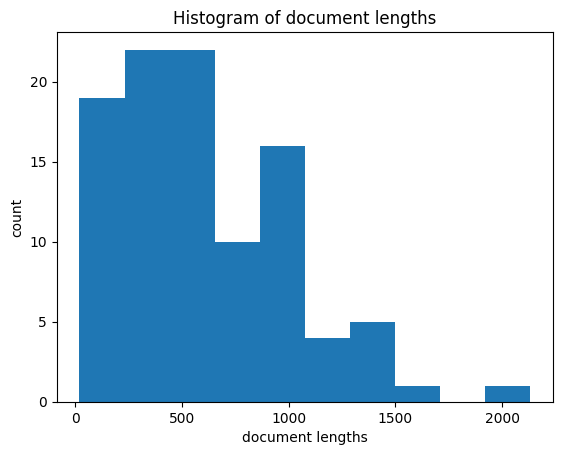

In [23]:
fig, ax = plt.subplots()
plot_doc_lengths_hist(fig, ax, corpus_small, y_log=False)  # use linear scale
plt.show();

We can improve this plot, e.g. to better see the distribution of small documents:

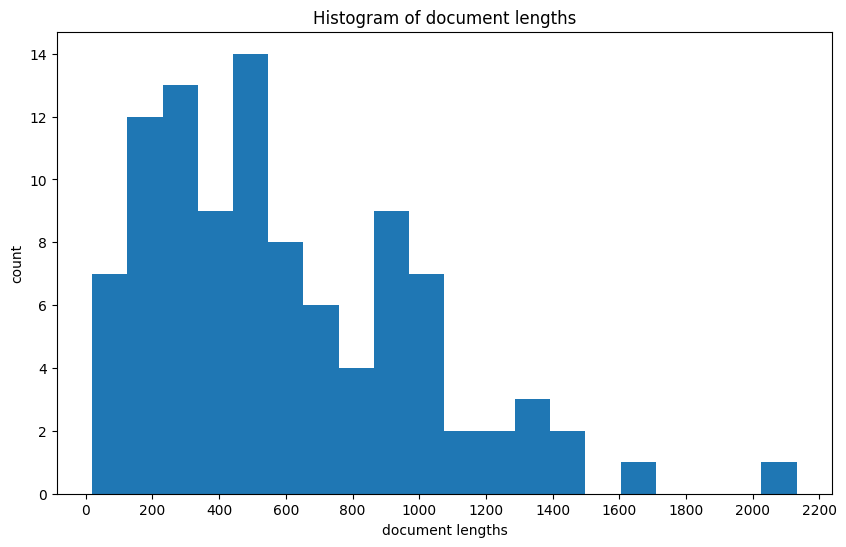

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))   # make the plot larger
plot_doc_lengths_hist(fig, ax, corpus_small, y_log=False, bins=20)  # use 20 bins
ax.set_xticks(range(0, 2201, 200))    # set x axis ticks and range
plt.show();

As expected, this is a right skewed distribution with a few quite large documents with more than 1500 tokens, but also several documents that are very small (less than 100 tokens). The above example shows nicely how you can adjust the plot before and after applying tmtoolkit's plotting function.

The function [plot_doc_frequencies_hist](api.rst#tmtoolkit.corpus.visualize.plot_doc_frequencies_hist) lets us plot the distribution of document frequencies of each token type. This time, we stick with the log10 scale on the y-axis, because otherwise the token types with high document frequency would be hardly visible in the plot, since there are so few of them.

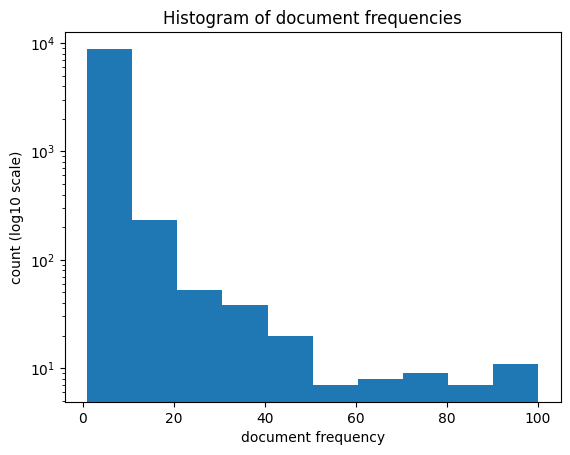

In [25]:
fig, ax = plt.subplots()
plot_doc_frequencies_hist(fig, ax, corpus_small)
plt.show();

This shows us that the large majority of token types has a low document frequency, i.e. they occur only in a few documents. There are only very few token types that occur in almost every document. Words like "the" or "a" are usually among these.

Another common type of plot is a *rank-frequency distribution* plot for token frequencies. This means the tokens are ordered in descending order from the most frequent token to the least frequent token. This forms the x-axis. On the y-axis the frequency of the respective tokens is plotted. Rank and frequency of tokens in text corpora usually have an inverse relationship, i.e. the second most frequent token occurs only half as often as the most frequent token, the token on rank 100 only has 1/100 of the frequency of the most frequent token, etc. This is a power law distribution which appears as nearly straight line when plotted on a log-log scale (i.e. a log scale on both axes).

We can also observe that in our small corpus using the [plot_ranked_vocab_counts](api.rst#tmtoolkit.corpus.visualize.plot_ranked_vocab_counts) function, which by default uses a log-log scale:

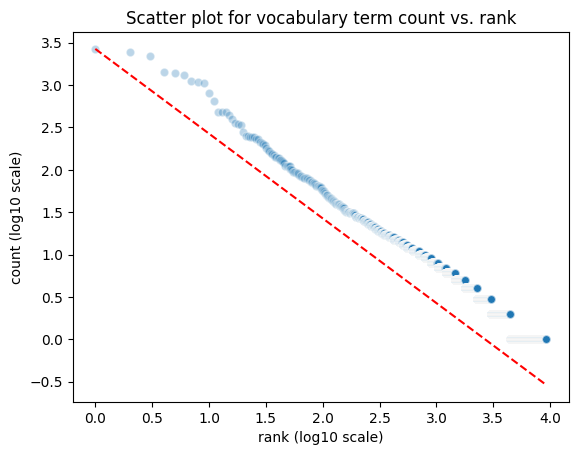

In [26]:
fig, ax = plt.subplots()
plot_ranked_vocab_counts(fig, ax, corpus_small, zipf=True)
plt.show();

I additionally passed the argument `zipf=True` which compares the corpus' distribution to the distribution predicted by [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law).

## Text processing: transforming documents and tokens

So far we haven't modified anything in our corpus, we only investigated its contents. This will change now as we will apply several text processing methods to the contents of our corpus. But before we do that, I want you pay attention to an important detail about how a `Corpus` object behaves when it is modified.

### Aside: A `Corpus` object as "state machine"

A `Corpus` object is implemented as a "state machine", i.e. its contents (the documents) and behavior can change when you apply a function to it. For instance, let's suppose we want to turn all tokens in a corpus to lowercase tokens. We do that by applying [to_lowercase](api.rst#tmtoolkit.corpus.to_lowercase):


```python
corp = Corpus({
    "doc1": "Hello world!",
    "doc2": "Another example"
}, language='en')

doc_tokens(corp)

# Out:
# {
#   'doc1': ['Hello', 'world', '!'],
#   'doc2': ['Another', 'example']
# }

to_lowercase(corp)
doc_tokens(corp)

# Out:
# {
#   'doc1': ['hello', 'world', '!'],
#   'doc2': ['another', 'example']
# }
```

As you can see, the tokens "inside" `corp` are changed *in place*. It's important to see that after applying the function `to_lowercase`, the tokens in `corp` were transformed and **the original tokens from before calling this method are not available anymore.** In Python, assigning a *mutable* object to a variable binds the same object only to a different name, it doesn't copy it. Since a `Corpus` object is a mutable object (you can change its contents), when we simply assign such an object to a different variable (say `corp_original`) we essentially only have two names for the same object and by applying a function to one of these variable names, the values will be changed for *both* names.

#### Copying `Corpus` objects

What can we do about that? There are two ways: The first is to *copy* the object which can be done with the Python [copy](https://docs.python.org/3/library/copy.html#copy.copy) function. By this, we create another variable `corpus_orig` that points to a separate `Corpus` object. The second way is to apply the corpus transformation function, e.g. `to_lowercase`, but set the parameter `inplace=False`. This will then return a *modified copy* and retain the original input corpus. The `inplace` parameter is a common corpus function parameter that is available for all functions that modify a `Corpus` object in some way. By default, it is set to `True`.

We start with the first way, copying a `Corpus` object:

In [27]:
from copy import copy


corpus_orig = copy(corpus_small)
print_summary(corpus_orig)   # same content

Corpus with 100 documents in English
> NewsArticles-1185 (1271 tokens): For more than a week,-France - has been rocked by ...
> NewsArticles-1353 (30 tokens): Islamic State battle : Fierce gunfight outside Mos...
> NewsArticles-1377 (774 tokens): Turkey - backed rebels in ' near full control ' of...
> NewsArticles-1100 (224 tokens): President Trump says he has asked the Justice Depa...
> NewsArticles-1407 (202 tokens): Minister reiterates Govt support for Finucane inqu...
> NewsArticles-1263 (410 tokens): Russian doctors use mobile field hospital to provi...
> NewsArticles-1472 (298 tokens): Royal Bank of Scotland sees losses widening    Bai...
> NewsArticles-1119 (975 tokens): An amazing moment in history : Donald Trump 's pre...
> NewsArticles-1515 (426 tokens): Trump suggests Obama was ' behind ' town hall prot...
> NewsArticles-1387 (513 tokens): Protests after Anaheim policeman drags teen , fire...
(and 90 more documents)
total number of tokens: 59598 / vocabulary size: 9223


In [28]:
# but the different IDs confirm that we have two different objects
id(corpus_small), id(corpus_orig)

(140371727039264, 140369852191680)

We now apply `to_lowercase` to `corpus_small`:

In [29]:
from tmtoolkit.corpus import to_lowercase

to_lowercase(corpus_small)
print_summary(corpus_small)  # all tokens are lowercase

Corpus with 100 documents in English
> NewsArticles-1185 (1271 tokens): for more than a week,-france - has been rocked by ...
> NewsArticles-1353 (30 tokens): islamic state battle : fierce gunfight outside mos...
> NewsArticles-1377 (774 tokens): turkey - backed rebels in ' near full control ' of...
> NewsArticles-1100 (224 tokens): president trump says he has asked the justice depa...
> NewsArticles-1407 (202 tokens): minister reiterates govt support for finucane inqu...
> NewsArticles-1263 (410 tokens): russian doctors use mobile field hospital to provi...
> NewsArticles-1472 (298 tokens): royal bank of scotland sees losses widening    bai...
> NewsArticles-1119 (975 tokens): an amazing moment in history : donald trump 's pre...
> NewsArticles-1515 (426 tokens): trump suggests obama was ' behind ' town hall prot...
> NewsArticles-1387 (513 tokens): protests after anaheim policeman drags teen , fire...
(and 90 more documents)
total number of tokens: 59598 / vocabulary size: 8369


The tokens of the copied original corpus remain unchanged:

In [30]:
print_summary(corpus_orig)

Corpus with 100 documents in English
> NewsArticles-1185 (1271 tokens): For more than a week,-France - has been rocked by ...
> NewsArticles-1353 (30 tokens): Islamic State battle : Fierce gunfight outside Mos...
> NewsArticles-1377 (774 tokens): Turkey - backed rebels in ' near full control ' of...
> NewsArticles-1100 (224 tokens): President Trump says he has asked the Justice Depa...
> NewsArticles-1407 (202 tokens): Minister reiterates Govt support for Finucane inqu...
> NewsArticles-1263 (410 tokens): Russian doctors use mobile field hospital to provi...
> NewsArticles-1472 (298 tokens): Royal Bank of Scotland sees losses widening    Bai...
> NewsArticles-1119 (975 tokens): An amazing moment in history : Donald Trump 's pre...
> NewsArticles-1515 (426 tokens): Trump suggests Obama was ' behind ' town hall prot...
> NewsArticles-1387 (513 tokens): Protests after Anaheim policeman drags teen , fire...
(and 90 more documents)
total number of tokens: 59598 / vocabulary size: 9223


Note that this also uses up almost twice as much computer memory now. So you shouldn't create copies that often and also release unused memory by using `del`:

In [31]:
# removing the object again
del corpus_small

Now to the second approach. We pass the `inplace=False` parameter and get back a transformed copy of `corpus_orig` as return value:

In [32]:
corpus_lowercase = to_lowercase(corpus_orig, inplace=False)
print_summary(corpus_lowercase)

Corpus with 100 documents in English
> NewsArticles-1185 (1271 tokens): for more than a week,-france - has been rocked by ...
> NewsArticles-1353 (30 tokens): islamic state battle : fierce gunfight outside mos...
> NewsArticles-1377 (774 tokens): turkey - backed rebels in ' near full control ' of...
> NewsArticles-1100 (224 tokens): president trump says he has asked the justice depa...
> NewsArticles-1407 (202 tokens): minister reiterates govt support for finucane inqu...
> NewsArticles-1263 (410 tokens): russian doctors use mobile field hospital to provi...
> NewsArticles-1472 (298 tokens): royal bank of scotland sees losses widening    bai...
> NewsArticles-1119 (975 tokens): an amazing moment in history : donald trump 's pre...
> NewsArticles-1515 (426 tokens): trump suggests obama was ' behind ' town hall prot...
> NewsArticles-1387 (513 tokens): protests after anaheim policeman drags teen , fire...
(and 90 more documents)
total number of tokens: 59598 / vocabulary size: 8369


Again, the original corpus stays unchanged:

In [33]:
print_summary(corpus_orig)

Corpus with 100 documents in English
> NewsArticles-1185 (1271 tokens): For more than a week,-France - has been rocked by ...
> NewsArticles-1353 (30 tokens): Islamic State battle : Fierce gunfight outside Mos...
> NewsArticles-1377 (774 tokens): Turkey - backed rebels in ' near full control ' of...
> NewsArticles-1100 (224 tokens): President Trump says he has asked the Justice Depa...
> NewsArticles-1407 (202 tokens): Minister reiterates Govt support for Finucane inqu...
> NewsArticles-1263 (410 tokens): Russian doctors use mobile field hospital to provi...
> NewsArticles-1472 (298 tokens): Royal Bank of Scotland sees losses widening    Bai...
> NewsArticles-1119 (975 tokens): An amazing moment in history : Donald Trump 's pre...
> NewsArticles-1515 (426 tokens): Trump suggests Obama was ' behind ' town hall prot...
> NewsArticles-1387 (513 tokens): Protests after Anaheim policeman drags teen , fire...
(and 90 more documents)
total number of tokens: 59598 / vocabulary size: 9223


In [34]:
del corpus_lowercase

We're now ready to apply some common text processing steps to our corpus.

### Lemmatization and token normalization

Lemmatization brings a token, if it is a word, to its base form. The lemma is already found out during the tokenization process and is available in the `lemma` token attribute. However, when you want to further process the tokens on the base of the lemmata, you should use the [lemmatize](api.rst#tmtoolkit.corpus.lemmatize) corpus function. This function sets the lemmata as tokens and all further processing will happen using these lemmatized tokens:

In [35]:
from tmtoolkit.corpus import lemmatize

# we use `inplace=False` to generate a lemmatized copy `corpus_norm`
# of the original data; all further steps will be applied to `corpus_norm`
corpus_norm = lemmatize(corpus_orig, inplace=False)
tokens_table(corpus_norm)

,doc,position,token,is_punct,is_stop,lemma,like_num,pos,tag
0,NewsArticles-1100,0,President,False,False,President,False,PROPN,NNP
1,NewsArticles-1100,1,Trump,False,False,Trump,False,PROPN,NNP
2,NewsArticles-1100,2,say,False,False,say,False,VERB,VBZ
3,NewsArticles-1100,3,he,False,True,he,False,PRON,PRP
4,NewsArticles-1100,4,have,False,True,have,False,AUX,VBZ
...,...,...,...,...,...,...,...,...,...
59593,NewsArticles-960,282,priority,False,False,priority,False,NOUN,NNS
59594,NewsArticles-960,283,for,False,True,for,False,ADP,IN
59595,NewsArticles-960,284,the,False,True,the,False,DET,DT
59596,NewsArticles-960,285,nation,False,False,nation,False,NOUN,NN


As we can see, the `lemma` column was copied over to the `token` column.

<div class="alert alert-info">

**Stemming**
    
tmtoolkit doesn't support stemming directly, since lemmatization is generally accepted as a better approach to bring different word forms of one word to a common base form. However, you may install [NLTK](https://www.nltk.org/) and apply stemming by using the [stem](api.rst#tmtoolkit.corpus.stem) function.
    
</div>

Depending on how you further want to analyze the data, it may be necessary to "clean" or "normalize" your tokens in different ways in order to remove noise from the corpus, such as punctuation tokens or numbers, upper/lowercase forms of the same word, etc. Note that this is usually not necessary when you work with some approaches such as word embeddings (word vectors).   

If you want to remove certain characters in *all* tokens in your documents, you can use [remove_chars](api.rst#tmtoolkit.corpus.remove_chars) and pass it a sequence of characters to remove. There is also a shortcut [remove_punctuation](api.rst#tmtoolkit.corpus.remove_punctuation) which will remove all punctuation characters (all characters in [string.punction](https://docs.python.org/3/library/string.html#string.punctuation) by default) *in* tokens. This means, a token like "vs." will be transformed to "vs" and a token "," will be transformed to an empty token "". It's useful to also remove empty tokens and we will do that in a later step.

In [36]:
from tmtoolkit.corpus import remove_chars

# remove only full stops "."
remove_chars(corpus_norm, ['.'])
print_summary(corpus_norm)

Corpus with 100 documents in English
> NewsArticles-1185 (1271 tokens): for more than a week,-france - have be rock by - t...
> NewsArticles-1353 (30 tokens): islamic State battle : fierce gunfight outside Mos...
> NewsArticles-1377 (774 tokens): Turkey - back rebel in ' near full control ' of Al...
> NewsArticles-1100 (224 tokens): President Trump say he have ask the Justice Depart...
> NewsArticles-1407 (202 tokens): Minister reiterate Govt support for Finucane inqui...
> NewsArticles-1263 (410 tokens): russian doctor use mobile field hospital to provid...
> NewsArticles-1472 (298 tokens): Royal Bank of Scotland see loss widen    bail - ou...
> NewsArticles-1119 (975 tokens): an amazing moment in history : Donald Trump 's pre...
> NewsArticles-1515 (426 tokens): Trump suggest Obama be ' behind ' town hall protes...
> NewsArticles-1387 (513 tokens): protest after Anaheim policeman drag teen , fire g...
(and 90 more documents)
total number of tokens: 59598 / vocabulary size: 7287


In [37]:
from tmtoolkit.corpus import remove_punctuation

# remove all punctuation
remove_punctuation(corpus_norm)
print_summary(corpus_norm)

Corpus with 100 documents in English
> NewsArticles-1185 (1271 tokens): for more than a weekfrance  have be rock by  tensi...
> NewsArticles-1353 (30 tokens): islamic State battle  fierce gunfight outside Mosu...
> NewsArticles-1377 (774 tokens): Turkey  back rebel in  near full control  of Al Ba...
> NewsArticles-1100 (224 tokens): President Trump say he have ask the Justice Depart...
> NewsArticles-1407 (202 tokens): Minister reiterate Govt support for Finucane inqui...
> NewsArticles-1263 (410 tokens): russian doctor use mobile field hospital to provid...
> NewsArticles-1472 (298 tokens): Royal Bank of Scotland see loss widen  bail  out R...
> NewsArticles-1119 (975 tokens): an amazing moment in history  Donald Trump s press...
> NewsArticles-1515 (426 tokens): Trump suggest Obama be  behind  town hall protest ...
> NewsArticles-1387 (513 tokens): protest after Anaheim policeman drag teen  fire gu...
(and 90 more documents)
total number of tokens: 59598 / vocabulary size: 7203


Notice how the vocabulary size (the number of unique token types in a corpus) was also reduced with each step. We can also confirm that our functions worked by comparing the set of characters used in the original corpus to the set of characters used at the current normalization step via [corpus_unique_chars](api.rst#tmtoolkit.corpus.corpus_unique_chars). We can see that there are no more punctuation characters in the latter set:

In [38]:
from tmtoolkit.corpus import corpus_unique_chars

# original corpus
sorted(corpus_unique_chars(corpus_orig))

['\n',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 ']',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '�']

In [39]:
# transformed corpus
sorted(corpus_unique_chars(corpus_norm))

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '�']

A common (but harsh) practice is to transform all tokens to lowercase forms, which can be done with [to_lowercase](api.rst#tmtoolkit.corpus.to_lowercase), as already shown before:

In [40]:
to_lowercase(corpus_norm)
print_summary(corpus_norm)

Corpus with 100 documents in English
> NewsArticles-1185 (1271 tokens): for more than a weekfrance  have be rock by  tensi...
> NewsArticles-1353 (30 tokens): islamic state battle  fierce gunfight outside mosu...
> NewsArticles-1377 (774 tokens): turkey  back rebel in  near full control  of al ba...
> NewsArticles-1100 (224 tokens): president trump say he have ask the justice depart...
> NewsArticles-1407 (202 tokens): minister reiterate govt support for finucane inqui...
> NewsArticles-1263 (410 tokens): russian doctor use mobile field hospital to provid...
> NewsArticles-1472 (298 tokens): royal bank of scotland see loss widen  bail  out r...
> NewsArticles-1119 (975 tokens): an amazing moment in history  donald trump s press...
> NewsArticles-1515 (426 tokens): trump suggest obama be  behind  town hall protest ...
> NewsArticles-1387 (513 tokens): protest after anaheim policeman drag teen  fire gu...
(and 90 more documents)
total number of tokens: 59598 / vocabulary size: 6692


There are several ways on how to treat numbers in text. You may choose to leave them untreated, remove them completely or transform them to placeholders that only encode their magnitude. Number removal can be applied via [filter_clean_tokens](api.rst#tmtoolkit.corpus.filter_clean_tokens) which I will present later. Number transformation to magnitudes can be done via [numbers_to_magnitudes](api.rst#tmtoolkit.corpus.numbers_to_magnitudes) which I will show now. But first, let's get an overview about the numbers used in the corpus:

In [41]:
table_norm_num = tokens_table(corpus_norm, with_attr='like_num')
table_norm_num[table_norm_num.like_num]

,doc,position,token,like_num
288,NewsArticles-1119,64,fifteen,True
320,NewsArticles-1119,96,one,True
328,NewsArticles-1119,104,four,True
759,NewsArticles-1119,535,100,True
787,NewsArticles-1119,563,four,True
...,...,...,...,...
59253,NewsArticles-901,856,85,True
59256,NewsArticles-901,859,9,True
59374,NewsArticles-960,63,2021,True
59400,NewsArticles-960,89,2010,True


You can see all tokens that were detected as "number-like" by SpaCy. Those that consist of digits can be converted to their respective magnitudes using the mentioned `numbers_to_magnitudes` function. This function has many options for customization, but by default a two digits number will be converted to "10", a three digits number to "100", a ten digits number to "1,000,000,000", etc. You may customize this output, e.g. so that all numbers are converted to the form "NNN...". You can further drop or keep signs, use thousands separators, etc. Depending on your research context, it may or may not make sense to reduce numbers in such a way.

In [42]:
from tmtoolkit.corpus import numbers_to_magnitudes

numbers_to_magnitudes(corpus_norm)
table_norm_num = tokens_table(corpus_norm, with_attr='like_num')
table_norm_num[table_norm_num.like_num]

,doc,position,token,like_num
288,NewsArticles-1119,64,fifteen,True
320,NewsArticles-1119,96,one,True
328,NewsArticles-1119,104,four,True
759,NewsArticles-1119,535,100,True
787,NewsArticles-1119,563,four,True
...,...,...,...,...
59253,NewsArticles-901,856,10,True
59256,NewsArticles-901,859,1,True
59374,NewsArticles-960,63,1000,True
59400,NewsArticles-960,89,1000,True


As we can see, all numbers with digits were converted to their respective magnitudes.

The function [filter_clean_tokens](api.rst#tmtoolkit.corpus.filter_clean_tokens) finally applies several steps that remove tokens that meet certain criteria. This includes removing:

- punctuation tokens (i.e. all tokens with attribute `is_punct` set to `True`)
- stopwords (very common words for the given language, i.e. all tokens with attribute `is_stop` set to `True`)
- empty tokens (i.e. `''`)
- tokens that are longer or shorter than a certain number of characters
- "number-like" tokens

This method has many parameters to tweak, so it's recommended to check out the documentation.

In [43]:
from tmtoolkit.corpus import filter_clean_tokens

# remove punct., stopwords, empty tokens (this is the default)
# plus tokens shorter than 2 characters
filter_clean_tokens(corpus_norm, remove_shorter_than=2)
print_summary(corpus_norm)

Corpus with 100 documents in English
> NewsArticles-1185 (578 tokens): weekfrance rock tension flare police officer alleg...
> NewsArticles-1353 (21 tokens): islamic state battle fierce gunfight outside mosul...
> NewsArticles-1377 (398 tokens): turkey back rebel near control al bab turkey defen...
> NewsArticles-1100 (96 tokens): president trump say ask justice department investi...
> NewsArticles-1407 (105 tokens): minister reiterate govt support finucane inquiry m...
> NewsArticles-1263 (202 tokens): russian doctor use mobile field hospital provide m...
> NewsArticles-1472 (163 tokens): royal bank scotland see loss widen bail royal bank...
> NewsArticles-1119 (404 tokens): amazing moment history donald trump press conferen...
> NewsArticles-1515 (182 tokens): trump suggest obama town hall protest president do...
> NewsArticles-1387 (253 tokens): protest anaheim policeman drag teen fire gun lapd ...
(and 90 more documents)
total number of tokens: 28042 / vocabulary size: 6268


Due to the removal of several tokens in the previous steps, the overall number of tokens was almost halved as compared to the original corpus:

In [44]:
from tmtoolkit.corpus import corpus_num_tokens

corpus_num_tokens(corpus_orig), corpus_num_tokens(corpus_norm)

(59598, 28042)

We can also observe that the vocabulary got smaller after the processing steps, which, for large corpora, is also important in terms of computation time and memory consumption for later analyses:

In [45]:
vocabulary_size(corpus_orig), vocabulary_size(corpus_norm)

(9223, 6268)

You can also apply custom token transform functions by using [transform_tokens](api.rst#tmtoolkit.corpus.transform_tokens) and passing it a function that should be applied to each token in each document (hence it must accept one string argument).

First let's define such a function. Here we create a simple function that should return a token's "shape" in terms of the case of its characters:

In [46]:
def token_shape(t):
    return ''.join(['X' if str.isupper(c) else 'x' for c in t])

token_shape('EU'), token_shape('CamelCase'), token_shape('lower')

('XX', 'XxxxxXxxx', 'xxxxx')

We can now apply this function to our documents (we will use the original documents here, because they were not transformed to lower case):

In [47]:
from tmtoolkit.corpus import transform_tokens

corpus_shapes = transform_tokens(corpus_orig, func=token_shape, inplace=False)
print_summary(corpus_shapes)

Corpus with 100 documents in English
> NewsArticles-1185 (1271 tokens): Xxx xxxx xxxx x xxxxxxXxxxxx x xxx xxxx xxxxxx xx ...
> NewsArticles-1353 (30 tokens): Xxxxxxx Xxxxx xxxxxx x Xxxxxx xxxxxxxx xxxxxxx Xxx...
> NewsArticles-1377 (774 tokens): Xxxxxx x xxxxxx xxxxxx xx x xxxx xxxx xxxxxxx x xx...
> NewsArticles-1100 (224 tokens): Xxxxxxxxx Xxxxx xxxx xx xxx xxxxx xxx Xxxxxxx Xxxx...
> NewsArticles-1407 (202 tokens): Xxxxxxxx xxxxxxxxxx Xxxx xxxxxxx xxx Xxxxxxxx xxxx...
> NewsArticles-1263 (410 tokens): Xxxxxxx xxxxxxx xxx xxxxxx xxxxx xxxxxxxx xx xxxxx...
> NewsArticles-1472 (298 tokens): Xxxxx Xxxx xx Xxxxxxxx xxxx xxxxxx xxxxxxxx xx Xxx...
> NewsArticles-1119 (975 tokens): Xx xxxxxxx xxxxxx xx xxxxxxx x Xxxxxx Xxxxx xx xxx...
> NewsArticles-1515 (426 tokens): Xxxxx xxxxxxxx Xxxxx xxx x xxxxxx x xxxx xxxx xxxx...
> NewsArticles-1387 (513 tokens): Xxxxxxxx xxxxx Xxxxxxx xxxxxxxxx xxxxx xxxx x xxxx...
(and 90 more documents)
total number of tokens: 59598 / vocabulary size: 176


In [48]:
del corpus_shapes

There are several more token transforming functions available in tmtoolkit. These are listed in the [corpus module API](api.rst#tmtoolkit-corpus). There are for example functions to simplify or normalize unicode characters in tokens.

<div class="alert alert-info">

**Retokenization**
    
One important point to note is that although you may change a token's text via a transformation, its token attributes such as POS tag, lemma, etc. stay the same. This is because the SpaCy NLP pipeline is only run initially and in most of the cases this is fine. However, if you want to re-run the NLP pipeline after you've applied some transformations in order to re-tokenize and re-analyze the text so that token attributes are also updated, you should run the [corpus_retokenize](api.rst#tmtoolkit.corpus.corpus_retokenize) function.
    
</div>

### Identifying and joining token collocations

*Collocations* are tokens that occur together in a series frequently (i.e. more than would be expected by chance). Examples could be the collocations "United", "States" or "Bank", "of", "America". The tmtoolkit package provides functions for identifying and joining such series of tokens.

For identifying collocations, you can use [corpus_collocations](api.rst#tmtoolkit.corpus.corpus_collocations). By default, it will produce a dataframe ranked by a collocation statistic.

In [49]:
from tmtoolkit.corpus import corpus_collocations

corpus_collocations(corpus_norm).head(10)

,collocation,statistic
0,successor soviet,10.212809
1,anatolyevich sushchin,10.212809
2,alexsey alexseyevich,10.212809
3,alexseyevich belan,10.212809
4,akehmet tokbergenov,10.212809
5,ancaster ontario,10.212809
6,ontario toronto,10.212809
7,marissa mayer,10.212809
8,podesta internal,10.212809
9,diminish thrive,10.212809


The default statistic is the *positive pointwise mutual information (PPMI)* measure implemented in the [ppmi](api.rst#tmtoolkit.tokenseq._metrics.ppmi) function. You can use a different statistic via the `statistic` argument. Here, we use the PMI³ statistic from the [tokenseq](api.rst#module-tmtoolkit.tokenseq) module:

In [50]:
from tmtoolkit.tokenseq import pmi3

corpus_collocations(corpus_norm, statistic=pmi3).head(10)

/home/markus/Development/tmtoolkit/tmtoolkit/tokenseq/_metrics.py:129: RuntimeWarning: divide by zero encountered in log
  logxy = logfn(xy)


,collocation,statistic
0,le pen,-7.114798
1,white house,-7.941276
2,real estate,-8.004290
3,donald trump,-8.043160
4,kuala lumpur,-8.133367
5,united states,-8.187434
6,whatsapp tumblr,-8.266899
7,tumblr linkedin,-8.266899
8,digg reddit,-8.266899
9,reddit newsvine,-8.266899


There are a few more parameters to `corpus_collocations`. For instance, you can specify a minimum number for the collocation to occur using `min_count` and a threshold value on the calculated statistic via `threshold` and produce a list output instead of a dataframe via `as_table=False`:

In [51]:
corpus_collocations(corpus_norm, statistic=pmi3, min_count=5,
                    threshold=-5, as_table=False)

/home/markus/Development/tmtoolkit/tmtoolkit/tokenseq/_metrics.py:129: RuntimeWarning: divide by zero encountered in log
  logxy = logfn(xy)


[('white house', -4.1705337005796475),
 ('le pen', -4.1705337005796475),
 ('donald trump', -4.184123274560292),
 ('year old', -4.37305796469112),
 ('new york', -4.515374186871377),
 ('real estate', -4.575998808687811),
 ('president donald', -4.75002156266707),
 ('china daily', -4.783638173466056),
 ('far right', -4.863680881139593),
 ('prime minister', -4.900048525310467),
 ('north korean', -4.940257380836643),
 ('� �', -4.950692258129222),
 ('chuck berry', -4.950692258129222),
 ('body camera', -4.950692258129222)]

After identifying and investigating collocations, you may also choose to join some of them so that they form a single token. This can be done via [join_collocations_by_statistic](api.rst#tmtoolkit.corpus.join_collocations_by_statistic). Here, we specify the collocation statistic to use, we set a minimum threshold and also enable returning a set of actually joint tokens:

In [52]:
from tmtoolkit.corpus import join_collocations_by_statistic

join_collocations_by_statistic(corpus_norm, statistic=pmi3, min_count=5,
                               threshold=-5, return_joint_tokens=True)

{'body_camera',
 'china_daily',
 'chuck_berry',
 'donald_trump',
 'far_right',
 'le_pen',
 'new_york',
 'north_korean',
 'president_donald',
 'prime_minister',
 'real_estate',
 'white_house',
 'year_old',
 '�_�'}

These collocations were joint to form single tokens. We can check one of them to see in which documents this joint token appears by using the [find_documents](api.rst#tmtoolkit.corpus.find_documents) function. This function searches the documents for matches to one or more keywords or patterns. By default, it returns all documents with at least one match as dictionary that maps document labels to number of matches. Here, we use the common parameter `as_table` again to provide a tabular output:

In [53]:
from tmtoolkit.corpus import find_documents

find_documents(corpus_norm, 'far_right', as_table='-n_matches')

,doc,n_matches
1,NewsArticles-2431,6
0,NewsArticles-2487,4
2,NewsArticles-1185,1
3,NewsArticles-1853,1


Another option for joining collocations is using the [join_collocations_by_patterns](api.rst#tmtoolkit.corpus.join_collocations_by_patterns) function, which allows you to define a pattern of subsequent tokens that should be joint. Here, we want to join all subsequent tokens where the first token is "north" and the second is anything that starts with "korea*", i.e. matching for example "north", "korea" or "north", "korean". The pattern "korea*" is a *glob pattern* – details on pattern matching will be given in the next section.

In [54]:
from tmtoolkit.corpus import join_collocations_by_patterns

join_collocations_by_patterns(corpus_norm, ['north', 'korea*'], match_type='glob', return_joint_tokens=True)

{'north_korea', 'north_koreans'}

We can see, that three collocation patterns were joint. Again, we can find the documents that contain these patterns using a glob pattern:

In [55]:
find_documents(corpus_norm, 'north_korea*', match_type='glob' , as_table='-n_matches')

,doc,n_matches
0,NewsArticles-1587,18
1,NewsArticles-1860,11


### Visualizing corpus statistics of the transformed corpus

In order to see the effect of the corpus transformations on the distribution of tokens, we can again plot these transformations.

Plotting the distribution of document lengths on the same scale as for the original corpus reveals that the documents are now much shorter and that the distribution is much less dispersed:

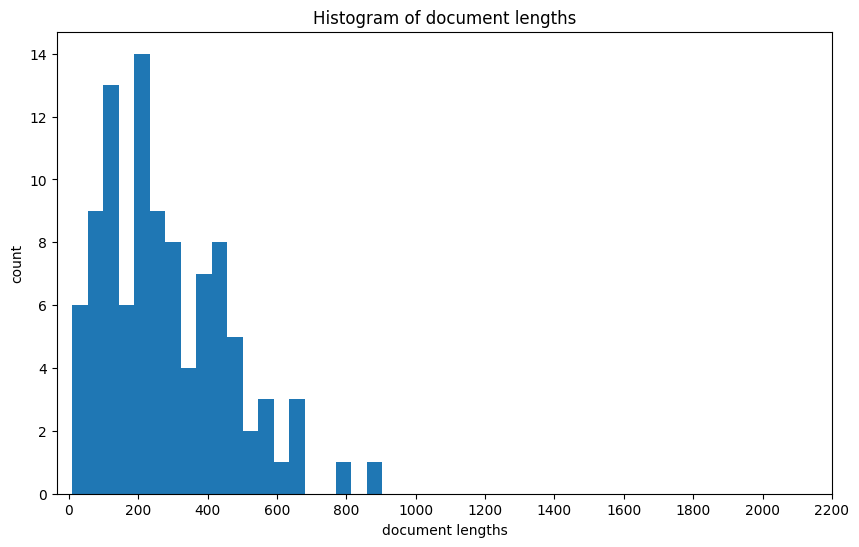

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))   # make the plot larger
plot_doc_lengths_hist(fig, ax, corpus_norm, y_log=False, bins=20)  # use 20 bins
ax.set_xticks(range(0, 2201, 200))    # set x axis ticks and range
plt.show();

We can also observe that there's now a much stronger deviation from the distribution predicted by Zipf's law. This is also expected, since we removed many high frequent token types (stopwords).

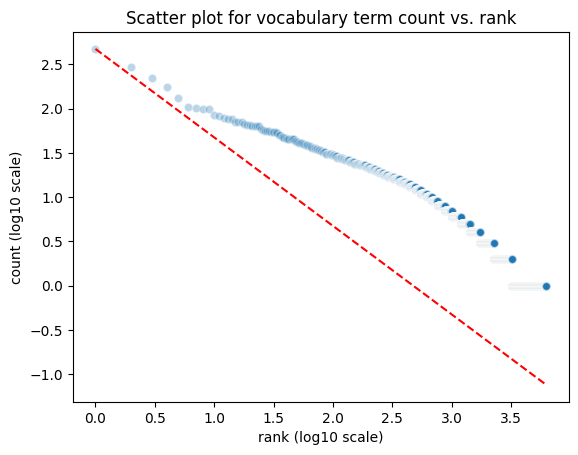

In [57]:
fig, ax = plt.subplots()
plot_ranked_vocab_counts(fig, ax, corpus_norm, zipf=True)
plt.show();

### Accessing the corpus documents as SpaCy documents

Sometimes it may be necessary to convert the documents of a corpus to SpaCy documents, i.e. [SpaCy Doc objects](https://spacy.io/api/doc). This may be the case when you need to use further functionality that SpaCy provides or if you interface with other code that requires SpaCy documents as input. For this purpose, you can use the [spacydocs](api.rst#tmtoolkit.corpus.spacydocs) function. The result will be a dictionary that maps document labels to SpaCy `Doc` objects.

In [58]:
from tmtoolkit.corpus import spacydocs

spacy_norm = spacydocs(corpus_norm, collapse=' ')
# check the type of a sample document
type(spacy_norm['NewsArticles-2433'])

spacy.tokens.doc.Doc

In [59]:
# show the first 10 tokens of a sample document
spacy_norm['NewsArticles-2433'][:10]

doj 1 russian spy indict yahoo hack washington cnnthe department

Note that the `spacydocs` functions will first generate the document texts from the current tokens via [doc_texts](api.rst#tmtoolkit.corpus.doc_texts). In case of `corpus_norm`, these are transformed (lower case) and filtered tokens. Because of that, we set `collapse=' '` for forcing a space between each token when recombining the document texts. Otherwise filtered tokens may be joint because of missing whitespace between them. After the document texts were generated, the corpus' NLP pipeline is applied to generate the SpaCy documents.

### Keywords-in-context (KWIC) and general filtering methods

*Keywords-in-context (KWIC)* allow you to quickly investigate certain keywords and their neighborhood of tokens, i.e. the tokens that appear right before and after this keyword.

There are three corpus functions for this purpose:

- [kwic](api.rst#tmtoolkit.corpus.kwic) is the base function accepting a search pattern and several options that control how the search pattern is matched (more on that below); use this function when you want to further process the output of a KWIC search;
- [kwic_table](api.rst#tmtoolkit.corpus.kwic_table) is the more "user friendly" version of the above function; it produces a dataframe with the highlighted keyword by default;
- [filter_tokens_with_kwic](api.rst#tmtoolkit.corpus.filter_tokens_with_kwic) works similar to the above functions but applies the result by filtering the documents; it is explained in the [section on filtering](#Filtering-tokens-and-documents);

Let's see the KWIC functions in action. We will start with `kwic` and use the original, unprocessed data:

In [60]:
from tmtoolkit.corpus import kwic

kwic(corpus_orig, 'house', ignore_case=True)

{'NewsArticles-2433': [],
 'NewsArticles-2225': [],
 'NewsArticles-2487': [['Dutch', 'lower', 'house', 'of', 'parliament']],
 'NewsArticles-49': [['by', 'White', 'House', 'bullying', '.']],
 'NewsArticles-469': [],
 'NewsArticles-2766': [],
 'NewsArticles-2712': [],
 'NewsArticles-2301': [['on', 'the', 'House', 'of', 'Representatives'],
  ['to', 'the', 'House', 'Intelligence', 'Committee'],
  ['The', 'White', 'House', 'on', 'Monday']],
 'NewsArticles-1377': [],
 'NewsArticles-3428': [],
 'NewsArticles-3208': [],
 'NewsArticles-2156': [],
 'NewsArticles-2143': [],
 'NewsArticles-2730': [],
 'NewsArticles-3159': [],
 'NewsArticles-3201': [],
 'NewsArticles-3353': [['purchased', 'a', 'house', 'outside', 'Mexico']],
 'NewsArticles-355': [],
 'NewsArticles-422': [],
 'NewsArticles-2867': [['along', 'White', 'House', 'fence', '\n\n'],
  ['the', 'White', 'House', ',', 'sources'],
  ['the', 'White', 'House', 'fence', ','],
  ['    ', 'White', 'House', 'press', 'secretary'],
  ['the', 'White', 

The function returns a dictionary that maps document labels to the KWIC results. Each document contains a list of "contexts", i.e. a list of tokens that surround a keyword, here `"house"`. This keyword stands in the middle and is surrounded by its "context tokens", which by default means two tokens to the left and two tokens to the right (which may be less when the keyword is near the start or the end of a document). 

We can see that "NewsArticles-2487" and "NewsArticles-49" contain one context, "NewsArticles-2301" contains three contexts, etc., but most documents don't contain the search pattern and hence provide an empty list as result.

With `kwic_table`, we get back a dataframe which provides a better formatting for quick investigation. See how the matched tokens are highlighted as `*house*` and empty results are removed:

In [61]:
from tmtoolkit.corpus import kwic_table

# showing only the first 10 results
kwic_table(corpus_orig, 'house', ignore_case=True).head(10)

,doc,context,token
0,NewsArticles-1119,0,new White *House* is being
1,NewsArticles-1119,1,his White *House* was in
2,NewsArticles-1119,2,his White *House* and a
0,NewsArticles-1263,0,near our *house* . I
0,NewsArticles-1546,0,of White *House* counselor -
0,NewsArticles-1610,0,. White *House* spokesman Sean
0,NewsArticles-2132,0,"the White *House* . """
1,NewsArticles-2132,1,a White *House* gathering of
0,NewsArticles-2301,0,on the *House* of Representatives
1,NewsArticles-2301,1,to the *House* Intelligence Committee


An important parameter is `context_size`. It determines the number of tokens to display left and right to the found keyword. You can either pass a single integer for a symmetric context or a tuple with integers `(<left>, <right>)`:

In [62]:
# 4 tokens to each side of the keyword (only display first 10 rows)
kwic_table(corpus_orig, 'house', ignore_case=True, context_size=4).head(10)

,doc,context,token
0,NewsArticles-1119,0,way his new White *House* is being portrayed and
1,NewsArticles-1119,1,"reports that his White *House* was in chaos ,"
2,NewsArticles-1119,2,coverage of his White *House* and a desire to
0,NewsArticles-1263,0,militants exploded near our *house* . I was fr...
0,NewsArticles-1546,0,bizarre image of White *House* counselor - Kel...
0,NewsArticles-1610,0,he said . White *House* spokesman Sean Spicer ...
0,NewsArticles-2132,0,"Cabinet at the White *House* . "" Hopefully we"
1,NewsArticles-2132,1,He told a White *House* gathering of Americans...
0,NewsArticles-2301,0,from lawmakers on the *House* of Representativ...
1,NewsArticles-2301,1,by Monday to the *House* Intelligence Committe...


In [63]:
# 1 token to the left, 4 tokens to the right of the keyword (only display first 10 rows)
kwic_table(corpus_orig, 'house', ignore_case=True, context_size=(1, 4)).head(10)

,doc,context,token
0,NewsArticles-1119,0,White *House* is being portrayed and
1,NewsArticles-1119,1,"White *House* was in chaos ,"
2,NewsArticles-1119,2,White *House* and a desire to
0,NewsArticles-1263,0,our *house* . I was frightened
0,NewsArticles-1546,0,White *House* counselor - Kellyanne Conway
0,NewsArticles-1610,0,White *House* spokesman Sean Spicer said
0,NewsArticles-2132,0,"White *House* . "" Hopefully we"
1,NewsArticles-2132,1,White *House* gathering of Americans who
0,NewsArticles-2301,0,the *House* of Representatives Intelligence Co...
1,NewsArticles-2301,1,"the *House* Intelligence Committee , which"


The KWIC functions become really powerful when using the pattern matching options. So far, we were looking for *exact* (but case insensitive) matches between the corpus tokens and our keyword `"house"`. However, it is also possible to match patterns like `"new*"` (matches any token starting with "new") or `"agenc(y|ies)"` (a regular expression matching "agency" and "agencies"). The next section gives an introduction on the different options for pattern matching.

#### Common parameters for pattern matching functions

Several functions and methods in tmtoolkit support pattern matching, including the already mentioned function `find_documents` and the KWIC functions, but also functions for filtering tokens or documents as you will see later. They all share similar function signatures, i.e. similar parameters:

- `search_token` or `search_tokens`: allows to specify one or more patterns as strings
- `match_type`: sets the matching type and can be one of the following options:
  - `'exact'` (default): exact string matching (optionally ignoring character case), i.e. no pattern matching
  - `'regex'` uses [regular expression](https://docs.python.org/3/library/re.html) matching
  - `'glob'` uses "glob patterns" like `"politic*"` which matches for example "politic", "politics" or "politician" (see [globre package](https://pypi.org/project/globre/))
- `ignore_case`: ignore character case (applies to all three match types)
- `glob_method`: if `match_type` is 'glob', use this glob method. Must be `'match'` or `'search'` (similar behavior as Python's [re.match](https://docs.python.org/3/library/re.html#re.match) or [re.search](https://docs.python.org/3/library/re.html#re.search))
- `inverse`: inverse the match results, i.e. if matching for "hello", return all results that do *not* match "hello"

Let's try out some of these options with `kwic_table`:

In [64]:
# using a regular expression, ignoring case (only display first 10 rows)
kwic_table(corpus_orig, r'agenc(y|ies)', match_type='regex', ignore_case=True).head(10)

,doc,context,token
0,NewsArticles-1100,0,in various *agencies* who had
0,NewsArticles-1377,0,Anadolu news *agency* . Earlier
1,NewsArticles-1377,1,and news *agencies*
0,NewsArticles-1561,0,National Crime *Agency* every month
1,NewsArticles-1561,1,National Crime *Agency* for specialist
0,NewsArticles-1610,0,. Source:-News *agencies*
0,NewsArticles-1860,0,state news *agency* . The
0,NewsArticles-2156,0,ministries and *agencies* in all
0,NewsArticles-2301,0,. Source:-News *agencies*
0,NewsArticles-2433,0,said the *agency* has not


In [65]:
# using a glob, ignoring case (only display first 10 rows)
kwic_table(corpus_orig, 'pol*', match_type='glob', ignore_case=True).head(10)

,doc,context,token
0,NewsArticles-1119,0,modern American *political* history .
1,NewsArticles-1119,1,"than the *political* media ,"
2,NewsArticles-1119,2,"his own *poll* numbers ,"
3,NewsArticles-1119,3,Washington 's *political* establishment and
4,NewsArticles-1119,4,Trump among *political* elites in
0,NewsArticles-1185,0,over a *police* - officer
1,NewsArticles-1185,1,the latest *police* violation to
2,NewsArticles-1185,2,- against *police* brutality.-
3,NewsArticles-1185,3,when the *police* stopped him
4,NewsArticles-1185,4,by the *police* circulated on


In [66]:
# using a glob, ignoring case (only display first 10 rows)
kwic_table(corpus_orig, '*sol*', match_type='glob', ignore_case=True).head(10)

,doc,context,token
0,NewsArticles-1119,0,leaks are *absolutely* real .
0,NewsArticles-1185,0,the biggest *unresolved* problem is
0,NewsArticles-1407,0,of Belfast *solicitor* - Pat
0,NewsArticles-1587,0,"North 's *isolationist* regime ,"
1,NewsArticles-1587,1,"in the *isolated* country ,"
0,NewsArticles-1787,0,roundabout legal *solution* for an
0,NewsArticles-1860,0,"embraced the *isolated* state ,"
1,NewsArticles-1860,1,have been *sold* to North
0,NewsArticles-2152,0,""" rock *solid* "" support"
1,NewsArticles-2152,1,a negotiated *solution* and deny


In [67]:
# using a regex that matches all tokens with at least one vowel and
# inverting these matches, i.e. all tokens *without* any vowels
# (only display first 10 rows)
kwic_table(corpus_orig, r'[AEIOUaeiou]', match_type='regex', inverse=True).head(10)

,doc,context,token
0,NewsArticles-1100,0,investigate leaks *\n\n* President Trump
1,NewsArticles-1100,1,his administration *.* The news
2,NewsArticles-1100,2,"leaks are *""* very serious"
3,NewsArticles-1100,3,"very serious *.* "" """
4,NewsArticles-1100,4,"serious . *""* "" I"
5,NewsArticles-1100,5,". "" *""* I 've"
6,NewsArticles-1100,6,the leaks *.* Those are
7,NewsArticles-1100,7,"criminal leaks *,* "" Trump"
8,NewsArticles-1100,8,"leaks , *""* Trump said"
9,NewsArticles-1100,9,"this afternoon *.* "" We"


#### Filtering tokens and documents

We can use the pattern matching parameters in numerous filtering methods. The heart of many of these methods is [token_match](api.rst#tmtoolkit.tokenseq.token_match). Given a search pattern, a list of tokens and optionally some pattern matching parameters, it returns a boolean NumPy array of the same length as the input tokens. Each occurrence of `True` in this boolean array signals a match.

In [68]:
from tmtoolkit.tokenseq import token_match

# first 20 tokens of document "NewsArticles-1100"
doc_snippet = corpus_orig['NewsArticles-1100']['token'][:20]
# get all tokens that match "to*"
matches = token_match('to*', doc_snippet, match_type='glob')

# show pair-wise results
list(zip(doc_snippet, matches))

[('President', False),
 ('Trump', False),
 ('says', False),
 ('he', False),
 ('has', False),
 ('asked', False),
 ('the', False),
 ('Justice', False),
 ('Department', False),
 ('to', True),
 ('investigate', False),
 ('leaks', False),
 ('\n\n', False),
 ('President', False),
 ('Trump', False),
 ('said', False),
 ('today', True),
 ('he', False),
 ('has', False),
 ('directed', False)]

The `token_match` function is a rather low-level function that you may use for pattern matching against any list/array of strings, e.g. a list of tokens, file names, etc.

The following functions cover common use-cases for filtering during text preprocessing. Many of these functions start either with `filter_...()` or `remove_...()` and these pairs of filter and remove functions are complements. A *filter function* will always *retain* the matched elements whereas a *remove function* will always *drop* the matched elements. Note that a remove function is actually a shortcut for a filter function with the parameter `inverse=True`.

We can observe that behavior with the first pair of functions, [filter_tokens](api.rst#tmtoolkit.corpus.filter_tokens) and [remove_tokens](api.rst#tmtoolkit.corpus.remove_tokens). Since these functions *modify* a corpus, you can again choose to make these modifications to the existing corpus object ("in-place") or return a modified corpus using the `inplace` parameter.

In [69]:
from tmtoolkit.corpus import filter_tokens

# retain only the tokens that match the pattern in each document
corpus_filtered = filter_tokens(corpus_orig, '*house*', match_type='glob',
                                ignore_case=True, inplace=False)
print_summary(corpus_filtered)

Corpus with 100 documents in English
> NewsArticles-1185 (0 tokens): 
> NewsArticles-1353 (0 tokens): 
> NewsArticles-1377 (0 tokens): 
> NewsArticles-1100 (0 tokens): 
> NewsArticles-1407 (0 tokens): 
> NewsArticles-1263 (1 tokens): house
> NewsArticles-1472 (0 tokens): 
> NewsArticles-1119 (3 tokens): House House House
> NewsArticles-1515 (0 tokens): 
> NewsArticles-1387 (0 tokens): 
(and 90 more documents)
total number of tokens: 53 / vocabulary size: 8


In [70]:
from tmtoolkit.corpus import remove_tokens

# remove the tokens that match the pattern in each document
corpus_filtered = remove_tokens(corpus_orig, '*house*', match_type='glob',
                                ignore_case=True, inplace=False)
print_summary(corpus_filtered)

Corpus with 100 documents in English
> NewsArticles-1185 (1271 tokens): For more than a week,-France - has been rocked by ...
> NewsArticles-1353 (30 tokens): Islamic State battle : Fierce gunfight outside Mos...
> NewsArticles-1377 (774 tokens): Turkey - backed rebels in ' near full control ' of...
> NewsArticles-1100 (224 tokens): President Trump says he has asked the Justice Depa...
> NewsArticles-1407 (202 tokens): Minister reiterates Govt support for Finucane inqu...
> NewsArticles-1263 (409 tokens): Russian doctors use mobile field hospital to provi...
> NewsArticles-1472 (298 tokens): Royal Bank of Scotland sees losses widening    Bai...
> NewsArticles-1119 (972 tokens): An amazing moment in history : Donald Trump 's pre...
> NewsArticles-1515 (426 tokens): Trump suggests Obama was ' behind ' town hall prot...
> NewsArticles-1387 (513 tokens): Protests after Anaheim policeman drags teen , fire...
(and 90 more documents)
total number of tokens: 59545 / vocabulary size: 9215


The pair [filter_documents](api.rst#tmtoolkit.corpus.filter_documents) and [remove_documents](api.rst#tmtoolkit.corpus.remove_documents) works similarily, but filters or drops whole documents regarding the supplied match criteria. Both accept the standard pattern matching parameters, but also a parameter `matches_threshold` with default value `1`. When this number of matching tokens is hit, the document will be part of the result set (`filter_documents`) or removed from the result set (`remove_documents`). By this, we can for example retain only those documents that contain certain token patterns.

Let's try out these functions in practice:

In [71]:
from tmtoolkit.corpus import filter_documents

corpus_filtered = filter_documents(corpus_orig, '*house*', match_type='glob',
                                   ignore_case=True, inplace=False)
print_summary(corpus_filtered)

Corpus with 21 documents in English
> NewsArticles-2867 (170 tokens): Person detained after hopping bike - rack barrier ...
> NewsArticles-2641 (1225 tokens): Muslim Artist 's Dreamy Nude Self - Portraits Show...
> NewsArticles-2487 (1015 tokens): Dutch election : High turnout in key national vote...
> NewsArticles-2132 (490 tokens): Trump on health care : ' It 's a big , fat , beaut...
> NewsArticles-1546 (277 tokens): Kellyanne Conway 's Ultra - Casual Oval Office Pho...
> NewsArticles-1610 (380 tokens): Jewish community centres hit by wave of bomb threa...
> NewsArticles-2301 (464 tokens): DOJ seeks more time on Trump wiretapping inquiry  ...
> NewsArticles-1263 (410 tokens): Russian doctors use mobile field hospital to provi...
> NewsArticles-2431 (1678 tokens): Will Europe ride the populist wave ? A visual guid...
> NewsArticles-1119 (975 tokens): An amazing moment in history : Donald Trump 's pre...
(and 11 more documents)
total number of tokens: 16655 / vocabulary size: 3813


We can see that 21 out of 100 documents contained the pattern `'*house*'` and hence were retained.

We can also adjust `matches_threshold` to set the minimum number of token matches for filtering:

In [72]:
from tmtoolkit.corpus import filter_documents

corpus_filtered = filter_documents(corpus_orig, '*house*', match_type='glob',
                                   matches_threshold=4,
                                   ignore_case=True, inplace=False)
print_summary(corpus_filtered)

Corpus with 5 documents in English
> NewsArticles-72 (1054 tokens): Speaker John Bercow defends his comments on Donald...
> NewsArticles-3156 (554 tokens): Republicans working on changes to healthcare overh...
> NewsArticles-3094 (694 tokens): House Intel Chair : Trump Administration Documents...
> NewsArticles-3739 (491 tokens): Trump ally : Ivanka Trump 's new gig is n't nepoti...
> NewsArticles-2867 (170 tokens): Person detained after hopping bike - rack barrier ...
total number of tokens: 2963 / vocabulary size: 936


Five out of 100 documents contained the pattern `'*house*'` at least four times and hence were retained.

In [73]:
from tmtoolkit.corpus import remove_documents

corpus_filtered = remove_documents(corpus_orig, '*house*', match_type='glob',
                 ignore_case=True, inplace=False)
print_summary(corpus_filtered)

Corpus with 79 documents in English
> NewsArticles-1561 (539 tokens): Do not jail all paedophiles , says police chief   ...
> NewsArticles-1185 (1271 tokens): For more than a week,-France - has been rocked by ...
> NewsArticles-1377 (774 tokens): Turkey - backed rebels in ' near full control ' of...
> NewsArticles-1100 (224 tokens): President Trump says he has asked the Justice Depa...
> NewsArticles-1407 (202 tokens): Minister reiterates Govt support for Finucane inqu...
> NewsArticles-1519 (246 tokens): SpaceX announces planned private trip around moon ...
> NewsArticles-1472 (298 tokens): Royal Bank of Scotland sees losses widening    Bai...
> NewsArticles-1353 (30 tokens): Islamic State battle : Fierce gunfight outside Mos...
> NewsArticles-1515 (426 tokens): Trump suggests Obama was ' behind ' town hall prot...
> NewsArticles-1387 (513 tokens): Protests after Anaheim policeman drags teen , fire...
(and 69 more documents)
total number of tokens: 42943 / vocabulary size: 7573


When we use `remove_documents` we get only the documents that did *not* contain the specified pattern. Since we had 21 documents that contained the "house" pattern, we now have the complement set with the 79 documents that don't contain this pattern.

Another useful pair of functions is [filter_documents_by_label](api.rst#tmtoolkit.corpus.filter_documents_by_label) and [remove_documents_by_label](api.rst#tmtoolkit.corpus.remove_documents_by_label). Both functions again accept the same pattern matching parameters but they only apply them to the document names:

In [74]:
from tmtoolkit.corpus import filter_documents_by_label

corpus_filtered = filter_documents_by_label(corpus_orig, r'-\d{4}$',
                                            match_type='regex', inplace=False)
print_summary(corpus_filtered)

Corpus with 73 documents in English
> NewsArticles-1185 (1271 tokens): For more than a week,-France - has been rocked by ...
> NewsArticles-1353 (30 tokens): Islamic State battle : Fierce gunfight outside Mos...
> NewsArticles-1377 (774 tokens): Turkey - backed rebels in ' near full control ' of...
> NewsArticles-1100 (224 tokens): President Trump says he has asked the Justice Depa...
> NewsArticles-1407 (202 tokens): Minister reiterates Govt support for Finucane inqu...
> NewsArticles-1263 (410 tokens): Russian doctors use mobile field hospital to provi...
> NewsArticles-1472 (298 tokens): Royal Bank of Scotland sees losses widening    Bai...
> NewsArticles-1119 (975 tokens): An amazing moment in history : Donald Trump 's pre...
> NewsArticles-1515 (426 tokens): Trump suggests Obama was ' behind ' town hall prot...
> NewsArticles-1387 (513 tokens): Protests after Anaheim policeman drags teen , fire...
(and 63 more documents)
total number of tokens: 43114 / vocabulary size: 7598


In the above example we wanted to retain only the documents whose document labels ended with exactly 4 digits, like "...-1234". Hence, we only get "NewsArticles-1880" and "NewsArticles-3350" but not "NewsArticles-99". Again, `remove_documents_by_label` will do the exact opposite.

You may also use [Keywords-in-context (KWIC)](#Keywords-in-context-(KWIC)-and-general-filtering-methods) to filter your tokens in the neighborhood around certain keyword pattern(s). The method for that is called [filter_tokens_with_kwic](api.rst#tmtoolkit.corpus.filter_tokens_with_kwic) and works very similar to [kwic](api.rst#tmtoolkit.corpus.kwic), but filters the documents in the `Corpus` instance with which you can continue working as usual. Here, we filter the tokens in each document to get the tokens directly in front and after the glob pattern `'*house*'` (`context_size=1`):

In [75]:
from tmtoolkit.corpus import filter_tokens_with_kwic

corpus_filtered = filter_tokens_with_kwic(corpus_orig, '*house*',
                                          context_size=1, match_type='glob',
                                          ignore_case=True, inplace=False)
print_summary(corpus_filtered)

Corpus with 100 documents in English
> NewsArticles-1185 (0 tokens): 
> NewsArticles-1353 (0 tokens): 
> NewsArticles-1377 (0 tokens): 
> NewsArticles-1100 (0 tokens): 
> NewsArticles-1407 (0 tokens): 
> NewsArticles-1263 (3 tokens): our house .
> NewsArticles-1472 (0 tokens): 
> NewsArticles-1119 (9 tokens): White House is White House was White House and
> NewsArticles-1515 (0 tokens): 
> NewsArticles-1387 (0 tokens): 
(and 90 more documents)
total number of tokens: 158 / vocabulary size: 50


When your NLP pipeline annotated your documents' tokens with Part-of-Speech (POS) tags, you can also filter them using [filter_for_pos](api.rst#tmtoolkit.corpus.filter_for_pos):

In [76]:
from tmtoolkit.corpus import filter_for_pos

# "N" means filter for nouns
corpus_filtered = filter_for_pos(corpus_orig, 'N', inplace=False)
tokens_table(corpus_filtered)

,doc,position,token,is_punct,is_stop,lemma,like_num,pos,tag
0,NewsArticles-1100,0,President,False,False,President,False,PROPN,NNP
1,NewsArticles-1100,1,Trump,False,False,Trump,False,PROPN,NNP
2,NewsArticles-1100,2,Justice,False,False,Justice,False,PROPN,NNP
3,NewsArticles-1100,3,Department,False,False,Department,False,PROPN,NNP
4,NewsArticles-1100,4,leaks,False,False,leak,False,NOUN,NNS
...,...,...,...,...,...,...,...,...,...
17594,NewsArticles-960,90,Putin,False,False,Putin,False,PROPN,NNP
17595,NewsArticles-960,91,Russia,False,False,Russia,False,PROPN,NNP
17596,NewsArticles-960,92,capabilities,False,False,capability,False,NOUN,NNS
17597,NewsArticles-960,93,priorities,False,False,priority,False,NOUN,NNS


In this example we filtered for tokens that were identified as nouns by passing the *simplified POS tag* `'N'` (for more on simplified tags, see the function documentation). We can also filter for more than one tag, e.g. nouns or verbs by passing a list of required POS tags.

The `filter_for_pos` function has no `remove_...` counterpart, but you can set the `inverse` parameter to `True` to achieve the same effect.

Finally there are functions for removing tokens based on their document frequency: [filter_tokens_by_doc_frequency](api.rst#tmtoolkit.corpus.filter_tokens_by_doc_frequency) along with the shortcut functions [remove_common_tokens](api.rst#tmtoolkit.corpus.remove_common_tokens) and [remove_uncommon_tokens](api.rst#tmtoolkit.corpus.remove_uncommon_tokens). The former removes all tokens that have a document frequency greater or equal a certain threshold defined by parameter `df_threshold`. The latter does the same for all tokens that have a document frequency lower or equal `df_threshold`. This parameter accepts a frequency proportion (default) or absolute count (via parameter `proportions`).

Before applying the function, let's have a look at the total number of tokens again, to later see how many we  removed. We will also store the vocabulary in `orig_vocab` for later comparison:

In [77]:
from tmtoolkit.corpus import doc_lengths

orig_vocab = vocabulary(corpus_orig, sort=False)
corpus_num_tokens(corpus_orig)

59598

In [78]:
from tmtoolkit.corpus import remove_common_tokens

corpus_filtered = remove_common_tokens(corpus_orig, df_threshold=0.9, inplace=False)
corpus_num_tokens(corpus_filtered)

44102

By removing all tokens with a document frequency threshold of 0.9, we removed quite a number of tokens in each document. Let's investigate the vocabulary in order to see which tokens were removed:

In [79]:
# set difference gives removed vocabulary tokens
orig_vocab - vocabulary(corpus_filtered, sort=False)

{'\n\n',
 "'s",
 ',',
 '.',
 'a',
 'and',
 'in',
 'is',
 'of',
 'on',
 'that',
 'the',
 'to'}

We can see that this – as expected – removed very common token types.

The `remove_uncommon_tokens` function works similarily. This time, let's use an absolute number as threshold:

In [80]:
from tmtoolkit.corpus import remove_uncommon_tokens

corpus_filtered = remove_uncommon_tokens(corpus_orig, df_threshold=1,
                                         proportions=0, inplace=False)

# set difference gives removed vocabulary tokens
orig_vocab - vocabulary(corpus_filtered, sort=False)

{'lifetime',
 'Rumble',
 'Robbie',
 'Worried',
 'supervision',
 'advocacy',
 'Fitchburg',
 'takeaway',
 'Whoever',
 'assassinate',
 'territory',
 'Somalia',
 'QQ',
 'lawns',
 'Streamlining',
 'row',
 'symptoms',
 'Bridge',
 'unfathomable',
 'expressionism',
 'triggered',
 'squeeze',
 'Venus',
 'flagging',
 'Neath',
 'gender',
 'splash',
 'Bureau',
 'Self',
 'realism',
 'roles',
 'taquerias',
 'sponsors',
 'Policy',
 'yelling',
 'citizenship',
 'deteriorating',
 'Mandela',
 'threw',
 'Reelin',
 'Baron',
 'Airport',
 'resonant',
 'thanks',
 'Breitbart',
 'Let',
 'cu--',
 'sentimental',
 'stores',
 '2024',
 'deposit',
 'experts"?think',
 'rack',
 'Hua',
 'minor',
 'referring',
 'haggis',
 'Australian',
 'counsel',
 'roller',
 'wire',
 'Chavista',
 'ornate',
 'merge',
 'stationed',
 '1926',
 'Lamar',
 'terrier',
 'affecting',
 'drug',
 'epidemic',
 'mailed',
 'Organisations',
 'Javier',
 'English',
 'Wolfgang',
 '"?"hiba',
 'regularly',
 'Boldt',
 'menace',
 'fails',
 'professions',
 'Cali

The above means that we removed all tokens that appear only in exactly one document. As expected, these are rather uncommon token types.

There are more filtering functions available. See the [corpus functions API](api.rst#tmtoolkit-corpus) and search for `filter_` functions.

### Token cooccurrence matrices

We can use [token_cooccurrence](api.rst#tmtoolkit.corpus.token_cooccurrence) to calculate a token cooccurrence matrix, i.e. the number of times a token pair cooccures within a given context window:

In [81]:
from tmtoolkit.corpus import token_cooccurrence
from tmtoolkit.utils import pairwise_max_table

# remove stopwords and other uninformative tokens
to_lowercase(corpus_filtered)
filter_clean_tokens(corpus_filtered, remove_numbers=True)

# use `return_tokens` to obtain the labels of the matrix
cooc, cooc_labels = token_cooccurrence(corpus_filtered,
                                       context_size=3,
                                       return_tokens=True)
cooc

<2898x2898 sparse matrix of type '<class 'numpy.int32'>'
	with 98901 stored elements in Compressed Sparse Row format>

By default, the returned matrix is a sparse matrix as indicated above and it is computed for the whole vocabulary, i.e. for all unique tokens in the corpus. We obtain the vocabulary via `return_tokens=True`.

In [82]:
cooc_labels[:10]

['$',
 '+',
 '/tass/.',
 '01/27/2017',
 '12/16/2016',
 '1970s',
 '1980s',
 '80s',
 'a.m.',
 'abc']

Let's display the cooccurrences for the first 10 tokens in `cooc_labels`:

In [83]:
cooc[:10, :10].todense()

matrix([[8, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

This tells us for example that within a context window of 3 tokens to the left and to the right of the token `"$"` there is another `"$"` counted eight times for the given corpus.

The [pairwise_max_table](api.rst#tmtoolkit.utils.pairwise_max_table) helps to obtain the top cooccurrences in tabular form:

In [84]:
pairwise_max_table(cooc, labels=cooc_labels)

,x,y,value
2675,trump,donald,43
762,donald,trump,43
1951,president,trump,40
2247,said,trump,37
2897,�,�,32
...,...,...,...
853,enjoy,caring,1
854,enjoying,boost,1
856,ensuring,added,1
1996,prompted,anti,1


We can also generate a token cooccurrence matrix for a subset of the corpus vocabulary by passing it via the `tokens` argument. We additionally set the output as dataframe via `as_table=True`.

In [85]:
cooc_specific_tokens = ['trump', 'obama', 'merkel']
cooc_specific = token_cooccurrence(corpus_filtered,
                                   context_size=5,
                                   tokens=cooc_specific_tokens,
                                   as_table=True)
cooc_specific

,trump,obama,merkel
trump,32,19,0
obama,19,0,0
merkel,0,0,2


This tells us for example that within a context window of five tokens left and right of the token "trump", the token "obama" appears 19 times (and vice versa since the context window is symmetric).

### Working with document and token attributes

Each document and each token in a corpus can have an arbitrary number of *attributes* attached to it. Think of these attributes as meta information or "annotations" at document or token level. An example for a document attribute is the document label, i.e. its name. An example for a token attribute is the POS tag.

While the mentioned examples are attributes that tmtoolkit creates itself, you can also create your own attributes. For example, you may add a publication year as document attribute or a token attribute that indicates whether a token is in all caps. You can then use these attributes for example for filtering or in further analyses.

#### Document attributes

There are two functions for adding or updating document or token attributes, respectively: [set_document_attr](api.rst#tmtoolkit.corpus.set_document_attr) and [set_token_attr](api.rst#tmtoolkit.corpus.set_token_attr). We'll start with adding a new document attribute, `year`. At first we need to provide the attribute data as dict that maps document labels to document attribute values. For the purpose of this tutorial, we'll simply make up some data by drawing a random year for each document.

In [86]:
doc_years = {lbl: random.randint(2015, 2020) for lbl in corpus_orig}
doc_years

{'NewsArticles-2433': 2020,
 'NewsArticles-2225': 2020,
 'NewsArticles-2487': 2016,
 'NewsArticles-49': 2017,
 'NewsArticles-469': 2016,
 'NewsArticles-2766': 2017,
 'NewsArticles-2712': 2019,
 'NewsArticles-2301': 2019,
 'NewsArticles-1377': 2020,
 'NewsArticles-3428': 2016,
 'NewsArticles-3208': 2015,
 'NewsArticles-2156': 2018,
 'NewsArticles-2143': 2019,
 'NewsArticles-2730': 2019,
 'NewsArticles-3159': 2015,
 'NewsArticles-3201': 2018,
 'NewsArticles-3353': 2016,
 'NewsArticles-355': 2019,
 'NewsArticles-422': 2019,
 'NewsArticles-2867': 2019,
 'NewsArticles-2198': 2020,
 'NewsArticles-2702': 2015,
 'NewsArticles-3318': 2016,
 'NewsArticles-3770': 2017,
 'NewsArticles-770': 2017,
 'NewsArticles-2149': 2015,
 'NewsArticles-2502': 2016,
 'NewsArticles-555': 2017,
 'NewsArticles-2711': 2018,
 'NewsArticles-2431': 2017,
 'NewsArticles-1472': 2017,
 'NewsArticles-3309': 2018,
 'NewsArticles-2312': 2015,
 'NewsArticles-2152': 2020,
 'NewsArticles-1185': 2017,
 'NewsArticles-21': 2020,
 

We can now use `set_document_attr` to create the new document attribute and pass the data:

In [87]:
from tmtoolkit.corpus import set_document_attr

corpus_new = set_document_attr(corpus_orig, 'year', data=doc_years, inplace=False)
# using the `doc_attrs` property to check that the new attribute is recorded:
corpus_new.doc_attrs

('label', 'has_sents', 'year')

When we investigate the token table, we can see a new column `year` which is constant for each document:

In [88]:
tokens_table(corpus_new)

,doc,position,token,is_punct,is_stop,lemma,like_num,pos,tag,year
0,NewsArticles-1100,0,President,False,False,President,False,PROPN,NNP,2018
1,NewsArticles-1100,1,Trump,False,False,Trump,False,PROPN,NNP,2018
2,NewsArticles-1100,2,says,False,False,say,False,VERB,VBZ,2018
3,NewsArticles-1100,3,he,False,True,he,False,PRON,PRP,2018
4,NewsArticles-1100,4,has,False,True,have,False,AUX,VBZ,2018
...,...,...,...,...,...,...,...,...,...,...
59593,NewsArticles-960,282,priorities,False,False,priority,False,NOUN,NNS,2016
59594,NewsArticles-960,283,for,False,True,for,False,ADP,IN,2016
59595,NewsArticles-960,284,the,False,True,the,False,DET,DT,2016
59596,NewsArticles-960,285,nation,False,False,nation,False,NOUN,NN,2016


In the above example, we set a document attribute value for each document in the corpus. However, you can also just set values for a subset of the documents. All other documents will then also contain that document attribute, but with a default value which is determined with the `default` parameter. Let's find out all documents that contain the token "president" (ignoring case). This is only a subset of all documents. We create an attribute dictionary that assigns `True` to all these documents:

In [89]:
president_docs = find_documents(corpus_new, 'president', ignore_case=True)
president_attrs = {lbl: True for lbl in president_docs}
president_attrs

{'NewsArticles-2433': True,
 'NewsArticles-2225': True,
 'NewsArticles-2487': True,
 'NewsArticles-49': True,
 'NewsArticles-2766': True,
 'NewsArticles-2301': True,
 'NewsArticles-1377': True,
 'NewsArticles-3208': True,
 'NewsArticles-2143': True,
 'NewsArticles-3201': True,
 'NewsArticles-3353': True,
 'NewsArticles-2502': True,
 'NewsArticles-2431': True,
 'NewsArticles-3309': True,
 'NewsArticles-1185': True,
 'NewsArticles-21': True,
 'NewsArticles-2132': True,
 'NewsArticles-1119': True,
 'NewsArticles-549': True,
 'NewsArticles-760': True,
 'NewsArticles-2742': True,
 'NewsArticles-681': True,
 'NewsArticles-378': True,
 'NewsArticles-3562': True,
 'NewsArticles-3116': True,
 'NewsArticles-1610': True,
 'NewsArticles-72': True,
 'NewsArticles-1777': True,
 'NewsArticles-1100': True,
 'NewsArticles-3631': True,
 'NewsArticles-1515': True,
 'NewsArticles-1546': True,
 'NewsArticles-3192': True,
 'NewsArticles-662': True,
 'NewsArticles-3156': True,
 'NewsArticles-960': True,
 'Ne

We now use this dictionary to create a new document attribute `president`. All documents not contained in `president_attrs` will get the default attribute value `False`:

In [90]:
set_document_attr(corpus_new, 'president', data=president_attrs, default=False)
toktbl = tokens_table(corpus_new, with_attr=['year', 'president'])

# only show rows with document name, year and president indicator
toktbl[['doc', 'year', 'president']].drop_duplicates()

,doc,year,president
0,NewsArticles-1100,2018,True
224,NewsArticles-1119,2017,True
1199,NewsArticles-1185,2017,True
2470,NewsArticles-1263,2016,False
2880,NewsArticles-1353,2020,False
...,...,...,...
57599,NewsArticles-770,2017,False
57987,NewsArticles-780,2016,False
58110,NewsArticles-836,2015,False
58397,NewsArticles-901,2015,False


#### Token attributes

Similar to document attributes, we can use `set_token_attr` for creating or updating token attributes. However, this function has two modes of assigning attribute values to tokens. The default mode assigns each token occurrence, i.e. each token type, a certain attribute value. We will start with this mode.

We set a new token attribute `obama` and simply assign a boolean value to each token which is `True` when the token is "Obama", else `False`.

In [91]:
from tmtoolkit.corpus import set_token_attr

set_token_attr(corpus_new, 'obama', data={'Obama': True}, default=False)
# check the token attributes property
corpus_new.token_attrs

('is_punct', 'is_stop', 'like_num', 'tag', 'pos', 'lemma', 'obama')

We can see that it worked, but it isn't really useful:

In [92]:
toktbl = tokens_table(corpus_new)
toktbl[toktbl.obama].head(10)

,doc,position,token,is_punct,is_stop,lemma,like_num,obama,pos,president,tag,year
137,NewsArticles-1100,137,Obama,False,False,Obama,False,True,PROPN,True,NNP,2018
1072,NewsArticles-1119,848,Obama,False,False,Obama,False,True,PROPN,True,NNP,2017
4699,NewsArticles-1515,2,Obama,False,False,Obama,False,True,PROPN,True,NNP,2016
4715,NewsArticles-1515,18,Obama,False,False,Obama,False,True,PROPN,True,NNP,2016
4769,NewsArticles-1515,72,Obama,False,False,Obama,False,True,PROPN,True,NNP,2016
4815,NewsArticles-1515,118,Obama,False,False,Obama,False,True,PROPN,True,NNP,2016
4927,NewsArticles-1515,230,Obama,False,False,Obama,False,True,PROPN,True,NNP,2016
4950,NewsArticles-1515,253,Obama,False,False,Obama,False,True,PROPN,True,NNP,2016
4992,NewsArticles-1515,295,Obama,False,False,Obama,False,True,PROPN,True,NNP,2016
5087,NewsArticles-1515,390,Obama,False,False,Obama,False,True,PROPN,True,NNP,2016


The second mode to assign token attribute values is much more useful. In this mode, you provide a dictionary that maps a document label to a list or array of token attribute values. The list's/array's size must match the number of tokens in the respective document. With this, you can assign an attribute value to each token in each document. We will use this to add a token attribute that records the number of characters in each token. At first, we generate that data:

In [93]:
doc_toks = doc_tokens(corpus_new)

tok_lengths = {lbl: list(map(len, tok)) for lbl, tok in doc_toks.items()}
# show the number of characters for each token in a sample document
tok_lengths['NewsArticles-1100']

[9,
 5,
 4,
 2,
 3,
 5,
 3,
 7,
 10,
 2,
 11,
 5,
 2,
 9,
 5,
 4,
 5,
 2,
 3,
 8,
 3,
 10,
 2,
 7,
 2,
 4,
 4,
 3,
 5,
 4,
 4,
 4,
 9,
 6,
 3,
 14,
 1,
 3,
 4,
 5,
 4,
 1,
 12,
 4,
 10,
 5,
 2,
 4,
 4,
 3,
 5,
 3,
 1,
 4,
 7,
 1,
 1,
 1,
 1,
 3,
 8,
 6,
 3,
 7,
 10,
 2,
 4,
 4,
 3,
 5,
 1,
 5,
 3,
 8,
 5,
 1,
 1,
 5,
 4,
 4,
 9,
 1,
 1,
 2,
 3,
 7,
 4,
 4,
 4,
 9,
 1,
 2,
 2,
 1,
 8,
 3,
 1,
 1,
 2,
 4,
 5,
 6,
 4,
 3,
 7,
 4,
 8,
 3,
 9,
 2,
 4,
 8,
 7,
 1,
 2,
 9,
 4,
 3,
 5,
 4,
 6,
 4,
 6,
 4,
 3,
 5,
 2,
 5,
 2,
 7,
 8,
 3,
 3,
 4,
 9,
 6,
 3,
 5,
 14,
 1,
 3,
 4,
 1,
 1,
 1,
 5,
 3,
 3,
 3,
 2,
 8,
 7,
 3,
 2,
 4,
 3,
 6,
 2,
 1,
 1,
 7,
 5,
 5,
 7,
 2,
 10,
 10,
 1,
 5,
 4,
 2,
 5,
 4,
 2,
 7,
 2,
 6,
 5,
 11,
 3,
 3,
 5,
 1,
 1,
 4,
 3,
 2,
 4,
 3,
 7,
 1,
 4,
 5,
 2,
 4,
 3,
 7,
 1,
 6,
 5,
 2,
 3,
 1,
 3,
 5,
 3,
 7,
 1,
 1,
 5,
 4,
 1,
 4,
 2,
 1,
 10,
 5,
 1,
 6,
 5,
 4,
 3,
 7,
 1]

Now we pass this data but set `per_token_occurrence=False` to indicate that the data contains attribute values per token in each document.

In [94]:
set_token_attr(corpus_new, 'nchar', data=tok_lengths, per_token_occurrence=False)
tokens_table(corpus_new, with_attr='nchar')

,doc,position,token,nchar
0,NewsArticles-1100,0,President,9
1,NewsArticles-1100,1,Trump,5
2,NewsArticles-1100,2,says,4
3,NewsArticles-1100,3,he,2
4,NewsArticles-1100,4,has,3
...,...,...,...,...
59593,NewsArticles-960,282,priorities,10
59594,NewsArticles-960,283,for,3
59595,NewsArticles-960,284,the,3
59596,NewsArticles-960,285,nation,6


#### Removing attributes

Document and token attributes can be removed with [remove_document_attr](api.rst#tmtoolkit.corpus.remove_document_attr) and [remove_token_attr](api.rst#tmtoolkit.corpus.remove_token_attr) respectively.

In [95]:
from tmtoolkit.corpus import remove_document_attr

remove_document_attr(corpus_new, 'year')
corpus_new.doc_attrs

('label', 'has_sents', 'president')

In [96]:
from tmtoolkit.corpus import remove_token_attr

remove_token_attr(corpus_new, 'obama')
corpus_new.token_attrs

('is_punct', 'is_stop', 'like_num', 'tag', 'pos', 'lemma', 'nchar')

We can tell [filter_tokens](api.rst#tmtoolkit.corpus.filter_tokens) and similar functions to use document or token attributes instead of the tokens for matching. The common parameter name for this option is `by_attr`. For example, we can use the `nchar` attribute, which we created before, to filter for tokens of a certain length:

In [97]:
corpus_3chars = filter_tokens(corpus_new, 3, by_attr='nchar', inplace=False)
tokens_table(corpus_3chars, with_attr='nchar')

,doc,position,token,nchar
0,NewsArticles-1100,0,has,3
1,NewsArticles-1100,1,the,3
2,NewsArticles-1100,2,has,3
3,NewsArticles-1100,3,the,3
4,NewsArticles-1100,4,the,3
...,...,...,...,...
9277,NewsArticles-960,39,its,3
9278,NewsArticles-960,40,has,3
9279,NewsArticles-960,41,the,3
9280,NewsArticles-960,42,for,3


In [98]:
del corpus_3chars

Note that all matching options then apply to the token attribute column, in this case to the `nchar` column which contains integers. Since `filter_tokens` by default employs exact matching, we get all tokens where `nchar` equals the first argument, `3`. If we used regular expression or glob matching instead, this method would fail because you can only use that for string data.

If you want to use more complex filter queries, you should create a "filter mask" and pass it to [filter_tokens_by_mask](api.rst#tmtoolkit.corpus.filter_tokens_by_mask). A filter mask is a dictionary that maps a document label to a sequence of boolean values. For all occurrences of `True`, the respective token in the document will be retained, all others will be removed.

Let's try that out with a small example: We now generate the filter mask, which means for each document we create a boolean list or array that for each token in that document indicates whether that token should be kept or removed.

We will iterate through the document tokens with attributes supplied from `doc_tokens`. We set `as_arrays=True` to obtain the `nchar` and `pos` token attributes for each document as NumPy array.

In [99]:
doc_tokattrs = doc_tokens(corpus_new, with_attr=['nchar', 'pos'], as_arrays=True)

# show number of characters and POS tag of 
# first 10 tokens for a sample document
(doc_tokattrs['NewsArticles-2433']['nchar'][:10],
 doc_tokattrs['NewsArticles-2433']['pos'][:10])

(array([3, 1, 1, 7, 5, 8, 2, 5, 4, 2]),
 array(['NOUN', 'PUNCT', 'NUM', 'ADJ', 'NOUN', 'VERB', 'ADP', 'PROPN',
        'NOUN', 'SPACE'], dtype='<U5'))

Now we can create the filter mask. Since we generated the token attribute data as NumPy arrays before, we can directly and efficiently use NumPy functions such as `np.isin`.

In [100]:
import numpy as np

filter_mask = {}
for doc_label, doc_data in doc_tokattrs.items():
    tok_lengths = doc_data['nchar']
    tok_pos = doc_data['pos']
    # create a boolean array for nouns with token length less or equal 5
    filter_mask[doc_label] = (tok_lengths <= 5) & np.isin(tok_pos, ['NOUN', 'PROPN'])

# it's not necessary to add the filter mask as token attribute
# but it's a good way to check the mask
set_token_attr(corpus_new, 'small_nouns', data=filter_mask, per_token_occurrence=False)
tokens_table(corpus_new, with_attr=['nchar', 'pos', 'small_nouns'])

,doc,position,token,nchar,pos,small_nouns
0,NewsArticles-1100,0,President,9,PROPN,False
1,NewsArticles-1100,1,Trump,5,PROPN,True
2,NewsArticles-1100,2,says,4,VERB,False
3,NewsArticles-1100,3,he,2,PRON,False
4,NewsArticles-1100,4,has,3,AUX,False
...,...,...,...,...,...,...
59593,NewsArticles-960,282,priorities,10,NOUN,False
59594,NewsArticles-960,283,for,3,ADP,False
59595,NewsArticles-960,284,the,3,DET,False
59596,NewsArticles-960,285,nation,6,NOUN,False


Finally, we can pass the mask dict to `filter_tokens_by_mask`:

In [101]:
from tmtoolkit.corpus import filter_tokens_by_mask

filter_tokens_by_mask(corpus_new, mask=filter_mask)
tokens_table(corpus_new, with_attr=['nchar', 'pos', 'small_nouns'])

,doc,position,token,nchar,pos,small_nouns
0,NewsArticles-1100,0,Trump,5,PROPN,True
1,NewsArticles-1100,1,leaks,5,NOUN,True
2,NewsArticles-1100,2,Trump,5,PROPN,True
3,NewsArticles-1100,3,today,5,NOUN,True
4,NewsArticles-1100,4,leaks,5,NOUN,True
...,...,...,...,...,...,...
6913,NewsArticles-960,29,Trump,5,PROPN,True
6914,NewsArticles-960,30,U.S.,4,PROPN,True
6915,NewsArticles-960,31,rest,4,NOUN,True
6916,NewsArticles-960,32,world,5,NOUN,True


### Generating n-grams

So far, we worked with *unigrams*, i.e. each document consisted of a sequence of discrete tokens. We can also generate *n-grams* from our corpus where each document consists of a sequence of *n* subsequent tokens. An example would be:

Document: "This is a simple example."

**n=1 (unigrams):**

    ['This', 'is', 'a', 'simple', 'example', '.']

**n=2 (bigrams):**

    ['This is', 'is a', 'a simple', 'simple example', 'example .']

**n=3 (trigrams):**

    ['This is a', 'is a simple', 'a simple example', 'simple example .']

The function [ngrams](api.rst#tmtoolkit.corpus.ngrams) allows to generate n-grams. Here, we create bigrams and display a sample document, "NewsArticles-2433":

In [102]:
from tmtoolkit.corpus import ngrams

ngrams(corpus_orig, n=2)['NewsArticles-2433']

['DOJ :',
 ': 2',
 '2 Russian',
 'Russian spies',
 'spies indicted',
 'indicted in',
 'in Yahoo',
 'Yahoo hack',
 'hack \n\n',
 '\n\n Washington',
 'Washington (',
 '( CNN)The',
 'CNN)The Department',
 'Department of',
 'of Justice',
 'Justice announced',
 'announced Wednesday',
 'Wednesday that',
 'that four',
 'four people',
 'people --',
 '-- including',
 'including two',
 'two officers',
 'officers of',
 'of the',
 'the Russian',
 'Russian Federal',
 'Federal Security',
 'Security Service',
 'Service (',
 '( FSB',
 'FSB )',
 ') --',
 '-- have',
 'have been',
 'been indicted',
 'indicted in',
 'in connection',
 'connection to',
 'to a',
 'a massive',
 'massive hack',
 'hack of',
 'of Yahoo',
 'Yahoo information',
 'information .',
 '. \n\n',
 '\n\n The',
 'The hack',
 'hack ,',
 ', which',
 'which the',
 'the DOJ',
 'DOJ said',
 'said was',
 'was initiated',
 'initiated in',
 'in January',
 'January 2014',
 '2014 ,',
 ', affected',
 'affected at',
 'at least',
 'least 500',
 '500 mi

By default, the ngrams are joined with a space (can be adjusted via `join_str`), but you can disable that using `join=False` so that each n-gram is a list of size *n*:

In [103]:
ngrams(corpus_orig, n=3, join=False)['NewsArticles-2433']

[['DOJ', ':', '2'],
 [':', '2', 'Russian'],
 ['2', 'Russian', 'spies'],
 ['Russian', 'spies', 'indicted'],
 ['spies', 'indicted', 'in'],
 ['indicted', 'in', 'Yahoo'],
 ['in', 'Yahoo', 'hack'],
 ['Yahoo', 'hack', '\n\n'],
 ['hack', '\n\n', 'Washington'],
 ['\n\n', 'Washington', '('],
 ['Washington', '(', 'CNN)The'],
 ['(', 'CNN)The', 'Department'],
 ['CNN)The', 'Department', 'of'],
 ['Department', 'of', 'Justice'],
 ['of', 'Justice', 'announced'],
 ['Justice', 'announced', 'Wednesday'],
 ['announced', 'Wednesday', 'that'],
 ['Wednesday', 'that', 'four'],
 ['that', 'four', 'people'],
 ['four', 'people', '--'],
 ['people', '--', 'including'],
 ['--', 'including', 'two'],
 ['including', 'two', 'officers'],
 ['two', 'officers', 'of'],
 ['officers', 'of', 'the'],
 ['of', 'the', 'Russian'],
 ['the', 'Russian', 'Federal'],
 ['Russian', 'Federal', 'Security'],
 ['Federal', 'Security', 'Service'],
 ['Security', 'Service', '('],
 ['Service', '(', 'FSB'],
 ['(', 'FSB', ')'],
 ['FSB', ')', '--'],
 

Note that the `ngrams` functions just retrieves the tokens as n-grams, but doesn't alter the corpus contents in any way. In contrast to that, when you use the [corpus_ngramify](api.rst#tmtoolkit.corpus.corpus_ngramify) function the corpus object internally stores that you want to operate on n-grams in all further operations.

In the following example, we set the corpus to handle its tokens as bigrams. Note how `doc_tokens` then returns bigrams:

In [104]:
from tmtoolkit.corpus import corpus_ngramify

corpus_bigrams = corpus_ngramify(corpus_orig, n=2, inplace=False)
doc_tokens(corpus_bigrams)['NewsArticles-2433']

['DOJ :',
 ': 2',
 '2 Russian',
 'Russian spies',
 'spies indicted',
 'indicted in',
 'in Yahoo',
 'Yahoo hack',
 'hack \n\n',
 '\n\n Washington',
 'Washington (',
 '( CNN)The',
 'CNN)The Department',
 'Department of',
 'of Justice',
 'Justice announced',
 'announced Wednesday',
 'Wednesday that',
 'that four',
 'four people',
 'people --',
 '-- including',
 'including two',
 'two officers',
 'officers of',
 'of the',
 'the Russian',
 'Russian Federal',
 'Federal Security',
 'Security Service',
 'Service (',
 '( FSB',
 'FSB )',
 ') --',
 '-- have',
 'have been',
 'been indicted',
 'indicted in',
 'in connection',
 'connection to',
 'to a',
 'a massive',
 'massive hack',
 'hack of',
 'of Yahoo',
 'Yahoo information',
 'information .',
 '. \n\n',
 '\n\n The',
 'The hack',
 'hack ,',
 ', which',
 'which the',
 'the DOJ',
 'DOJ said',
 'said was',
 'was initiated',
 'initiated in',
 'in January',
 'January 2014',
 '2014 ,',
 ', affected',
 'affected at',
 'at least',
 'least 500',
 '500 mi

The same goes for `tokens_table`, too. Notice how each token attribute becomes a bigram, too:

In [105]:
tokens_table(corpus_bigrams)

,doc,position,token,is_punct,is_stop,lemma,like_num,pos,tag
0,NewsArticles-1100,0,President Trump,False False,False False,President Trump,False False,PROPN PROPN,NNP NNP
1,NewsArticles-1100,1,Trump says,False False,False False,Trump say,False False,PROPN VERB,NNP VBZ
2,NewsArticles-1100,2,says he,False False,False True,say he,False False,VERB PRON,VBZ PRP
3,NewsArticles-1100,3,he has,False False,True True,he have,False False,PRON AUX,PRP VBZ
4,NewsArticles-1100,4,has asked,False False,True False,have ask,False False,AUX VERB,VBZ VBN
...,...,...,...,...,...,...,...,...,...
59493,NewsArticles-960,281,the priorities,False False,True False,the priority,False False,DET NOUN,DT NNS
59494,NewsArticles-960,282,priorities for,False False,False True,priority for,False False,NOUN ADP,NNS IN
59495,NewsArticles-960,283,for the,False False,True True,for the,False False,ADP DET,IN DT
59496,NewsArticles-960,284,the nation,False False,True False,the nation,False False,DET NOUN,DT NN


In [106]:
del corpus_bigrams

### Generating a sparse document-term matrix (DTM)

If you're working with a bag-of-words representation of your data, you usually convert the preprocessed documents to a document-term matrix (DTM), which represents of the number of occurrences of each term (i.e. vocabulary token) in each document. This is a *N* rows by *M* columns matrix, where *N* is the number of documents and *M* is the vocabulary size (i.e. the number of unique tokens in the corpus).

Not all tokens from the vocabulary occur in all documents. In fact, many tokens will occur only in a small subset of the documents if you're dealing with a "real world" dataset. This means that most entries in such a DTM will be zero. Almost all functions in tmtoolkit therefore generate and work with *sparse matrices*, where only non-zero values are stored in computer memory.

For this example, we'll generate a DTM from the `corpus_norm` instance. First, let's check the number of documents and the vocabulary size:

In [107]:
len(corpus_norm), vocabulary_size(corpus_norm)

(100, 6279)

We can use the [dtm](api.rst#tmtoolkit.corpus.dtm) function to generate a sparse DTM from the current instance:

In [108]:
from tmtoolkit.corpus import dtm

dtm_norm = dtm(corpus_norm)
dtm_norm

<100x6279 sparse matrix of type '<class 'numpy.int32'>'
	with 17207 stored elements in Compressed Sparse Row format>

We can see that a sparse matrix with 100 rows (which corresponds with the number of documents) and 6271 columns was generated (which corresponds to the vocabulary size). 17204 elements in this matrix are non-zero.

We can convert this matrix to a non-sparse, i.e. *dense*, representation and see parts of its elements:

In [109]:
dtm_norm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

However, note that you should only convert a sparse matrix to a dense representation when you're either dealing with a small amount of data (which is what we're doing in this example), or use only a part of the full matrix. Converting a sparse matrix to a dense representation can otherwise easily exceed the available computer memory.

There exist different "formats" for sparse matrices, which have different advantages and disadvantages (see for example the [SciPy "sparse" module documentation](https://docs.scipy.org/doc/scipy/reference/sparse.html#usage-information)). **Not all formats support all operations that you can usually apply to an ordinary, dense matrix.** By default, the generated DTM is in *Compressed Sparse Row (CSR)* format. This format allows indexing and is especially optimized for fast row access. You may convert it to any other sparse matrix format; see the mentioned SciPy documentation for this.

The rows of the DTM are aligned to the *sorted* list of document labels and its columns are aligned to the *sorted* vocabulary. For example, let's find the frequency of the term "white_house" in the document "NewsArticles-2867" (remember that we transformed all tokens to lower case and joint the collocation "white house" in the normalized corpus `corpus_norm`). To do this, we find out the indices into the matrix. By default, the corpus functions `doc_labels` and `vocabulary` return sorted lists, so these will be aligned with our matrix rows and columns.

In [110]:
doc_labels(corpus_norm).index('NewsArticles-2867')

49

In [111]:
vocab_norm = vocabulary(corpus_norm)   # will later reuse that
vocab_norm.index('white_house')

6146

This means the frequency of the term "white_house" in the document "NewsArticles-2867" is located in row 49 and column 6139 of the DTM:

In [112]:
dtm_norm[49, 6139]

0

We can check that by using the `count` method on the tokens of this document:

In [113]:
corpus_norm['NewsArticles-2867']['token'].count('white_house')

6

See also the following example of finding out the index for "administration" and then getting an array that represents the number of occurrences of this token type across all 100 documents:

In [114]:
vocab_admin_ix = vocab_norm.index('administration')
dtm_norm[:, vocab_admin_ix].todense().flatten()

matrix([[2, 6, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int32)

The `dtm` function also allows to directly return the document labels and vocabulary that are aligned to the matrix, which is quicker and less error-prone. This can be achieved with the `return_doc_labels` and `return_vocab` parameters, respectively.

Another interesting option is the `as_table` parameter, which returns the result as dataframe. Note that you should only use this option for small datasets, as it returns a dense dataframe that consumes a lot of memory:

In [115]:
dtm(corpus_norm, as_table=True)

,01062017,01132017,01202017,01272017,0830,1,10,100,1000,10000,...,zapad,zeleny,zeping,zhang,zionist,zone,zor,zuma,�,�_�
NewsArticles-1100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NewsArticles-1119,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
NewsArticles-1185,0,0,0,0,0,0,4,1,4,0,...,0,0,0,0,0,1,0,0,0,0
NewsArticles-1263,0,0,0,0,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
NewsArticles-1353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NewsArticles-770,0,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,2,0,0,0,0
NewsArticles-780,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NewsArticles-836,0,0,0,0,0,2,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
NewsArticles-901,0,0,0,0,0,2,4,0,7,1,...,0,0,0,0,0,0,0,0,0,0


### Serialization: Saving and loading `Corpus` objects

The current state of a `Corpus` object can also be stored to a file on disk so that you (or someone else who has tmtoolkit installed) can later restore it using that file. The functions for that are [save_corpus_to_picklefile](api.rst#tmtoolkit.corpus.save_corpus_to_picklefile) and [load_corpus_from_picklefile](api.rst#tmtoolkit.corpus.load_corpus_from_picklefile).

Let's store the current state of the `corpus_norm` instance:

In [116]:
from tmtoolkit.corpus import save_corpus_to_picklefile

print_summary(corpus_norm)

save_corpus_to_picklefile(corpus_norm, 'data/corpus_norm.pickle')

Corpus with 100 documents in English
> NewsArticles-1185 (573 tokens): weekfrance rock tension flare police officer alleg...
> NewsArticles-1353 (21 tokens): islamic state battle fierce gunfight outside mosul...
> NewsArticles-1377 (397 tokens): turkey back rebel near control al bab turkey defen...
> NewsArticles-1100 (96 tokens): president trump say ask justice department investi...
> NewsArticles-1407 (105 tokens): minister reiterate govt support finucane inquiry m...
> NewsArticles-1263 (202 tokens): russian doctor use mobile field hospital provide m...
> NewsArticles-1472 (163 tokens): royal bank scotland see loss widen bail royal bank...
> NewsArticles-1119 (398 tokens): amazing moment history donald_trump press conferen...
> NewsArticles-1515 (181 tokens): trump suggest obama town hall protest president_do...
> NewsArticles-1387 (250 tokens): protest anaheim policeman drag teen fire gun lapd ...
(and 90 more documents)
total number of tokens: 27787 / vocabulary size: 6279


Let's change the object by retaining only documents that contain the token "house" (see the reduced number of documents):

In [117]:
filter_documents(corpus_norm, '*house*', match_type='glob')
print_summary(corpus_norm)

Corpus with 21 documents in English
> NewsArticles-2867 (85 tokens): person detain hop bike rack barrier white_house fe...
> NewsArticles-2641 (579 tokens): muslim artist dreamy nude self portrait power self...
> NewsArticles-2487 (462 tokens): dutch election high turnout key national vote cruc...
> NewsArticles-2132 (201 tokens): trump health care big fat beautiful negotiation wa...
> NewsArticles-1546 (118 tokens): kellyanne conway ultra casual oval office photo we...
> NewsArticles-1610 (192 tokens): jewish community centre hit wave bomb threat anti ...
> NewsArticles-2301 (214 tokens): doj seek time trump wiretappe inquiry justice depa...
> NewsArticles-1263 (202 tokens): russian doctor use mobile field hospital provide m...
> NewsArticles-2431 (777 tokens): europe ride populist wave visual guide cnneurope p...
> NewsArticles-1119 (398 tokens): amazing moment history donald_trump press conferen...
(and 11 more documents)
total number of tokens: 7578 / vocabulary size: 2677


We can restore the saved data using `load_corpus_from_picklefile`:

In [118]:
from tmtoolkit.corpus import load_corpus_from_picklefile

corpus_norm = load_corpus_from_picklefile('data/corpus_norm.pickle')
print_summary(corpus_norm)

Corpus with 100 documents in English
> NewsArticles-1185 (573 tokens): weekfrance rock tension flare police officer alleg...
> NewsArticles-1353 (21 tokens): islamic state battle fierce gunfight outside mosul...
> NewsArticles-1377 (397 tokens): turkey back rebel near control al bab turkey defen...
> NewsArticles-1100 (96 tokens): president trump say ask justice department investi...
> NewsArticles-1407 (105 tokens): minister reiterate govt support finucane inquiry m...
> NewsArticles-1263 (202 tokens): russian doctor use mobile field hospital provide m...
> NewsArticles-1472 (163 tokens): royal bank scotland see loss widen bail royal bank...
> NewsArticles-1119 (398 tokens): amazing moment history donald_trump press conferen...
> NewsArticles-1515 (181 tokens): trump suggest obama town hall protest president_do...
> NewsArticles-1387 (250 tokens): protest anaheim policeman drag teen fire gun lapd ...
(and 90 more documents)
total number of tokens: 27787 / vocabulary size: 6279


You can see that the full dataset with 100 documents was restored.

This is very useful especially when you have a large amount of data and time intensive operations, e.g. token transformations or filtering. When you're finished running these operations, you can easily store the current state to disk and later retrieve it without the need to re-run these operations.

---

The final result after applying preprocessing steps and hence transforming the text data is often a document-term matrix (DTM). The [bow module](api.rst#tmtoolkit-bow) contains several functions to work with DTMs, e.g. apply transformations such as *tf-idf* or compute some important summary statistics. The [next chapter](bow.ipynb) will introduce some of these functions.